## Analysis of Koala Physical Characteristics Across Different Regions

This assignment focuses on analyzing the physical characteristics of koalas from different regions in Australia to gain insights into how environmental factors like region and habitat influence their traits. Koalas, an iconic species in Australia, face numerous environmental challenges that can affect their growth and survival. The goal of this analysis is to identify patterns in koala body size and physical features, providing valuable data for conservation efforts and ecological studies.

#### Definition of the Columns

| Column               | Meaning                                                                 |
|:--------------------:|:-----------------------------------------------------------------------:|
| koala_id             | Unique identifier for each koala in the dataset.                         |
| region               | Categorical variable indicating the region where the koala is located.   |
| habitat              | Categorical variable representing the koala's habitat (e.g., VIC, QLD).  |
| gender               | Categorical variable representing the koala's gender (male or female).   |
| age_in_years         | Numeric variable showing the koala's age in years.                       |
| head_length          | Numeric variable measuring the length of the koala's head in cm.         |
| paw_size             | Numeric variable representing the size of the koala's paw in cm.         |
| foot_length          | Numeric variable showing the length of the koala's foot in cm.           |
| ear_size             | Numeric variable representing the koala's ear size in cm.                |
| skull_width          | Numeric variable measuring the koala's skull width in cm.                |
| eye_diameter         | Numeric variable representing the diameter of the koala's eye in cm.     |
| chest_circumference  | Numeric variable showing the koala's chest circumference in cm.          |
| belly_circumference  | Numeric variable representing the koala's belly circumference in cm.     |
| total_length         | Numeric variable indicating the koala's total body length in cm.         |

Through the analysis of this dataset, the assignment aims to uncover correlations between these physical traits and environmental factors, as well as provide actionable recommendations for koala cnservation strategies.


In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.formula.api import ols

import warnings
warnings.filterwarnings("ignore")

In [5]:
# Importing the excel file
koala_data = pd.read_excel("koalas_dataset.xlsx")

## Section - 1: Exploring the dataset

In [7]:
# Finding the number of records in the dataset
num_records = koala_data.shape[0]
print("Number of records in the dataset: ", num_records)

Number of records in the dataset:  104


In [8]:
# Finding the number of columns in the dataset
num_columns = koala_data.shape[1]
print("Number of columns in the dataset: ", num_columns)

Number of columns in the dataset:  14


In [9]:
# Displaying the first and last 5 records of the dataset
display(koala_data)

,koala_id,region,habitat,gender,age_in_years,Paw Size,total_length,head_length,ear_size,foot_length,skull_width,eye_diameter,chest_circumference,belly_circumference
0,1,1,VIC,m,8.0,16.0,77.0,19.1,19.5,24.5,15.4,2.2,63.0,61.0
1,2,1,VIC,f,6.0,16.5,79.5,17.5,16.2,22.5,12.6,3.0,63.5,58.0
2,3,1,VIC,f,6.0,19.0,83.5,19.0,16.9,25.4,15.0,2.5,65.0,59.0
3,4,1,VIC,f,6.0,18.0,80.0,18.2,17.2,26.1,12.1,2.2,63.0,59.0
4,5,1,VIC,f,2.0,16.0,73.5,16.5,18.2,21.0,11.3,2.1,63.5,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,QLD,m,1.0,16.5,69.5,14.5,11.8,16.0,11.0,1.8,58.0,52.0
100,101,7,q,m,1.0,19.0,70.5,13.6,13.0,14.4,9.7,1.0,60.0,58.0
101,102,7,QLD,f,6.0,18.0,77.0,17.4,10.4,13.5,10.0,0.6,60.0,55.0
102,103,7,QLD,m,4.0,16.5,70.5,16.5,10.9,12.9,10.2,2.4,60.0,54.0


In [10]:
# Checking the data type of the columns
koala_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   koala_id             104 non-null    int64  
 1   region               104 non-null    int64  
 2   habitat              104 non-null    object 
 3   gender               104 non-null    object 
 4   age_in_years         102 non-null    float64
 5   Paw Size             104 non-null    float64
 6   total_length         104 non-null    float64
 7   head_length          104 non-null    float64
 8   ear_size             104 non-null    float64
 9   foot_length          102 non-null    float64
 10  skull_width          103 non-null    float64
 11  eye_diameter         104 non-null    float64
 12  chest_circumference  104 non-null    float64
 13  belly_circumference  103 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [11]:
koala_data.nunique()

koala_id               104
region                   7
habitat                  8
gender                   4
age_in_years             9
Paw Size                19
total_length            34
head_length             71
ear_size                71
foot_length             74
skull_width             64
eye_diameter            33
chest_circumference     19
belly_circumference     24
dtype: int64

In [12]:
# Descriptive statistics to understand the distribution of the columns
koala_data.describe()

,koala_id,region,age_in_years,Paw Size,total_length,head_length,ear_size,foot_length,skull_width,eye_diameter,chest_circumference,belly_circumference
count,104.000000,104.000000,102.000000,104.000000,104.000000,104.000000,104.000000,102.000000,103.000000,104.000000,104.000000,103.000000
mean,52.500000,3.625000,3.833333,17.009615,75.088462,18.554808,22.650000,18.461765,12.917476,5.886538,62.000000,57.582524
std,30.166206,2.349086,1.909244,1.959518,4.310549,9.761017,87.562416,4.416935,11.160491,39.082636,2.045597,2.775150
min,1.000000,1.000000,1.000000,12.000000,63.000000,7.500000,5.300000,10.300000,5.000000,0.500000,57.000000,50.000000
25%,26.750000,1.000000,2.250000,15.875000,72.000000,15.700000,9.875000,14.550000,9.950000,1.400000,60.500000,56.000000
50%,52.500000,3.000000,3.000000,17.000000,76.000000,17.850000,11.900000,17.950000,11.300000,1.900000,62.000000,57.500000
75%,78.250000,6.000000,5.000000,18.000000,78.000000,19.800000,17.025000,22.500000,13.100000,2.725000,63.000000,59.250000
max,104.000000,7.000000,9.000000,23.000000,84.500000,110.500000,900.800000,27.900000,120.600000,400.500000,67.000000,65.000000


## Data Cleaning

### Converting datatypes

In [15]:
# Coverting 'koala_id' to object type
koala_data["koala_id"] = koala_data["koala_id"].astype("object")

# Converting 'region', 'habitat', and 'gender' to category type
koala_data["region"] = koala_data["region"].astype("category")
koala_data["habitat"] = koala_data["habitat"].astype("category")
koala_data["gender"] = koala_data["gender"].astype("category")

# Checking the data type of the columns
koala_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   koala_id             104 non-null    object  
 1   region               104 non-null    category
 2   habitat              104 non-null    category
 3   gender               104 non-null    category
 4   age_in_years         102 non-null    float64 
 5   Paw Size             104 non-null    float64 
 6   total_length         104 non-null    float64 
 7   head_length          104 non-null    float64 
 8   ear_size             104 non-null    float64 
 9   foot_length          102 non-null    float64 
 10  skull_width          103 non-null    float64 
 11  eye_diameter         104 non-null    float64 
 12  chest_circumference  104 non-null    float64 
 13  belly_circumference  103 non-null    float64 
dtypes: category(3), float64(10), object(1)
memory usage: 10.3+ KB


### Checking for duplicate values

In [17]:
# Checking for duplicates based on 'koala_id'
duplicates = koala_data[koala_data["koala_id"].duplicated()]

# Displaying the number of duplicate rows
num_duplicates = duplicates.shape[0]
print("Number of duplicate rows: ", num_duplicates)

Number of duplicate rows:  0


### Checking for missing values

In [19]:
# Checking for missing values
missing_values = koala_data.isnull().sum()

print("Number of missing values: \n", missing_values)

Number of missing values: 
 koala_id               0
region                 0
habitat                0
gender                 0
age_in_years           2
Paw Size               0
total_length           0
head_length            0
ear_size               0
foot_length            2
skull_width            1
eye_diameter           0
chest_circumference    0
belly_circumference    1
dtype: int64


### Handling the missing values

In [21]:
# Imputing missing values with the median of each column
koala_data['age_in_years'].fillna(koala_data['age_in_years'].median(), inplace=True)
koala_data['foot_length'].fillna(koala_data['foot_length'].median(), inplace=True)
koala_data['skull_width'].fillna(koala_data['skull_width'].median(), inplace=True)
koala_data['belly_circumference'].fillna(koala_data['belly_circumference'].median(), inplace=True)

# Verifying that no missing values remain
missing_values_after_imputation = koala_data.isnull().sum()
print("Number of missing values after imputing with median values: \n", missing_values_after_imputation)
koala_data.describe()

Number of missing values after imputing with median values: 
 koala_id               0
region                 0
habitat                0
gender                 0
age_in_years           0
Paw Size               0
total_length           0
head_length            0
ear_size               0
foot_length            0
skull_width            0
eye_diameter           0
chest_circumference    0
belly_circumference    0
dtype: int64


,age_in_years,Paw Size,total_length,head_length,ear_size,foot_length,skull_width,eye_diameter,chest_circumference,belly_circumference
count,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,3.817308,17.009615,75.088462,18.554808,22.650000,18.451923,12.901923,5.886538,62.000000,57.581731
std,1.894112,1.959518,4.310549,9.761017,87.562416,4.374412,11.107314,39.082636,2.045597,2.761657
min,1.000000,12.000000,63.000000,7.500000,5.300000,10.300000,5.000000,0.500000,57.000000,50.000000
25%,2.750000,15.875000,72.000000,15.700000,9.875000,14.650000,9.975000,1.400000,60.500000,56.000000
50%,3.000000,17.000000,76.000000,17.850000,11.900000,17.950000,11.300000,1.900000,62.000000,57.500000
75%,5.000000,18.000000,78.000000,19.800000,17.025000,22.500000,13.100000,2.725000,63.000000,59.125000
max,9.000000,23.000000,84.500000,110.500000,900.800000,27.900000,120.600000,400.500000,67.000000,65.000000


### Checking the data distribution and skewness

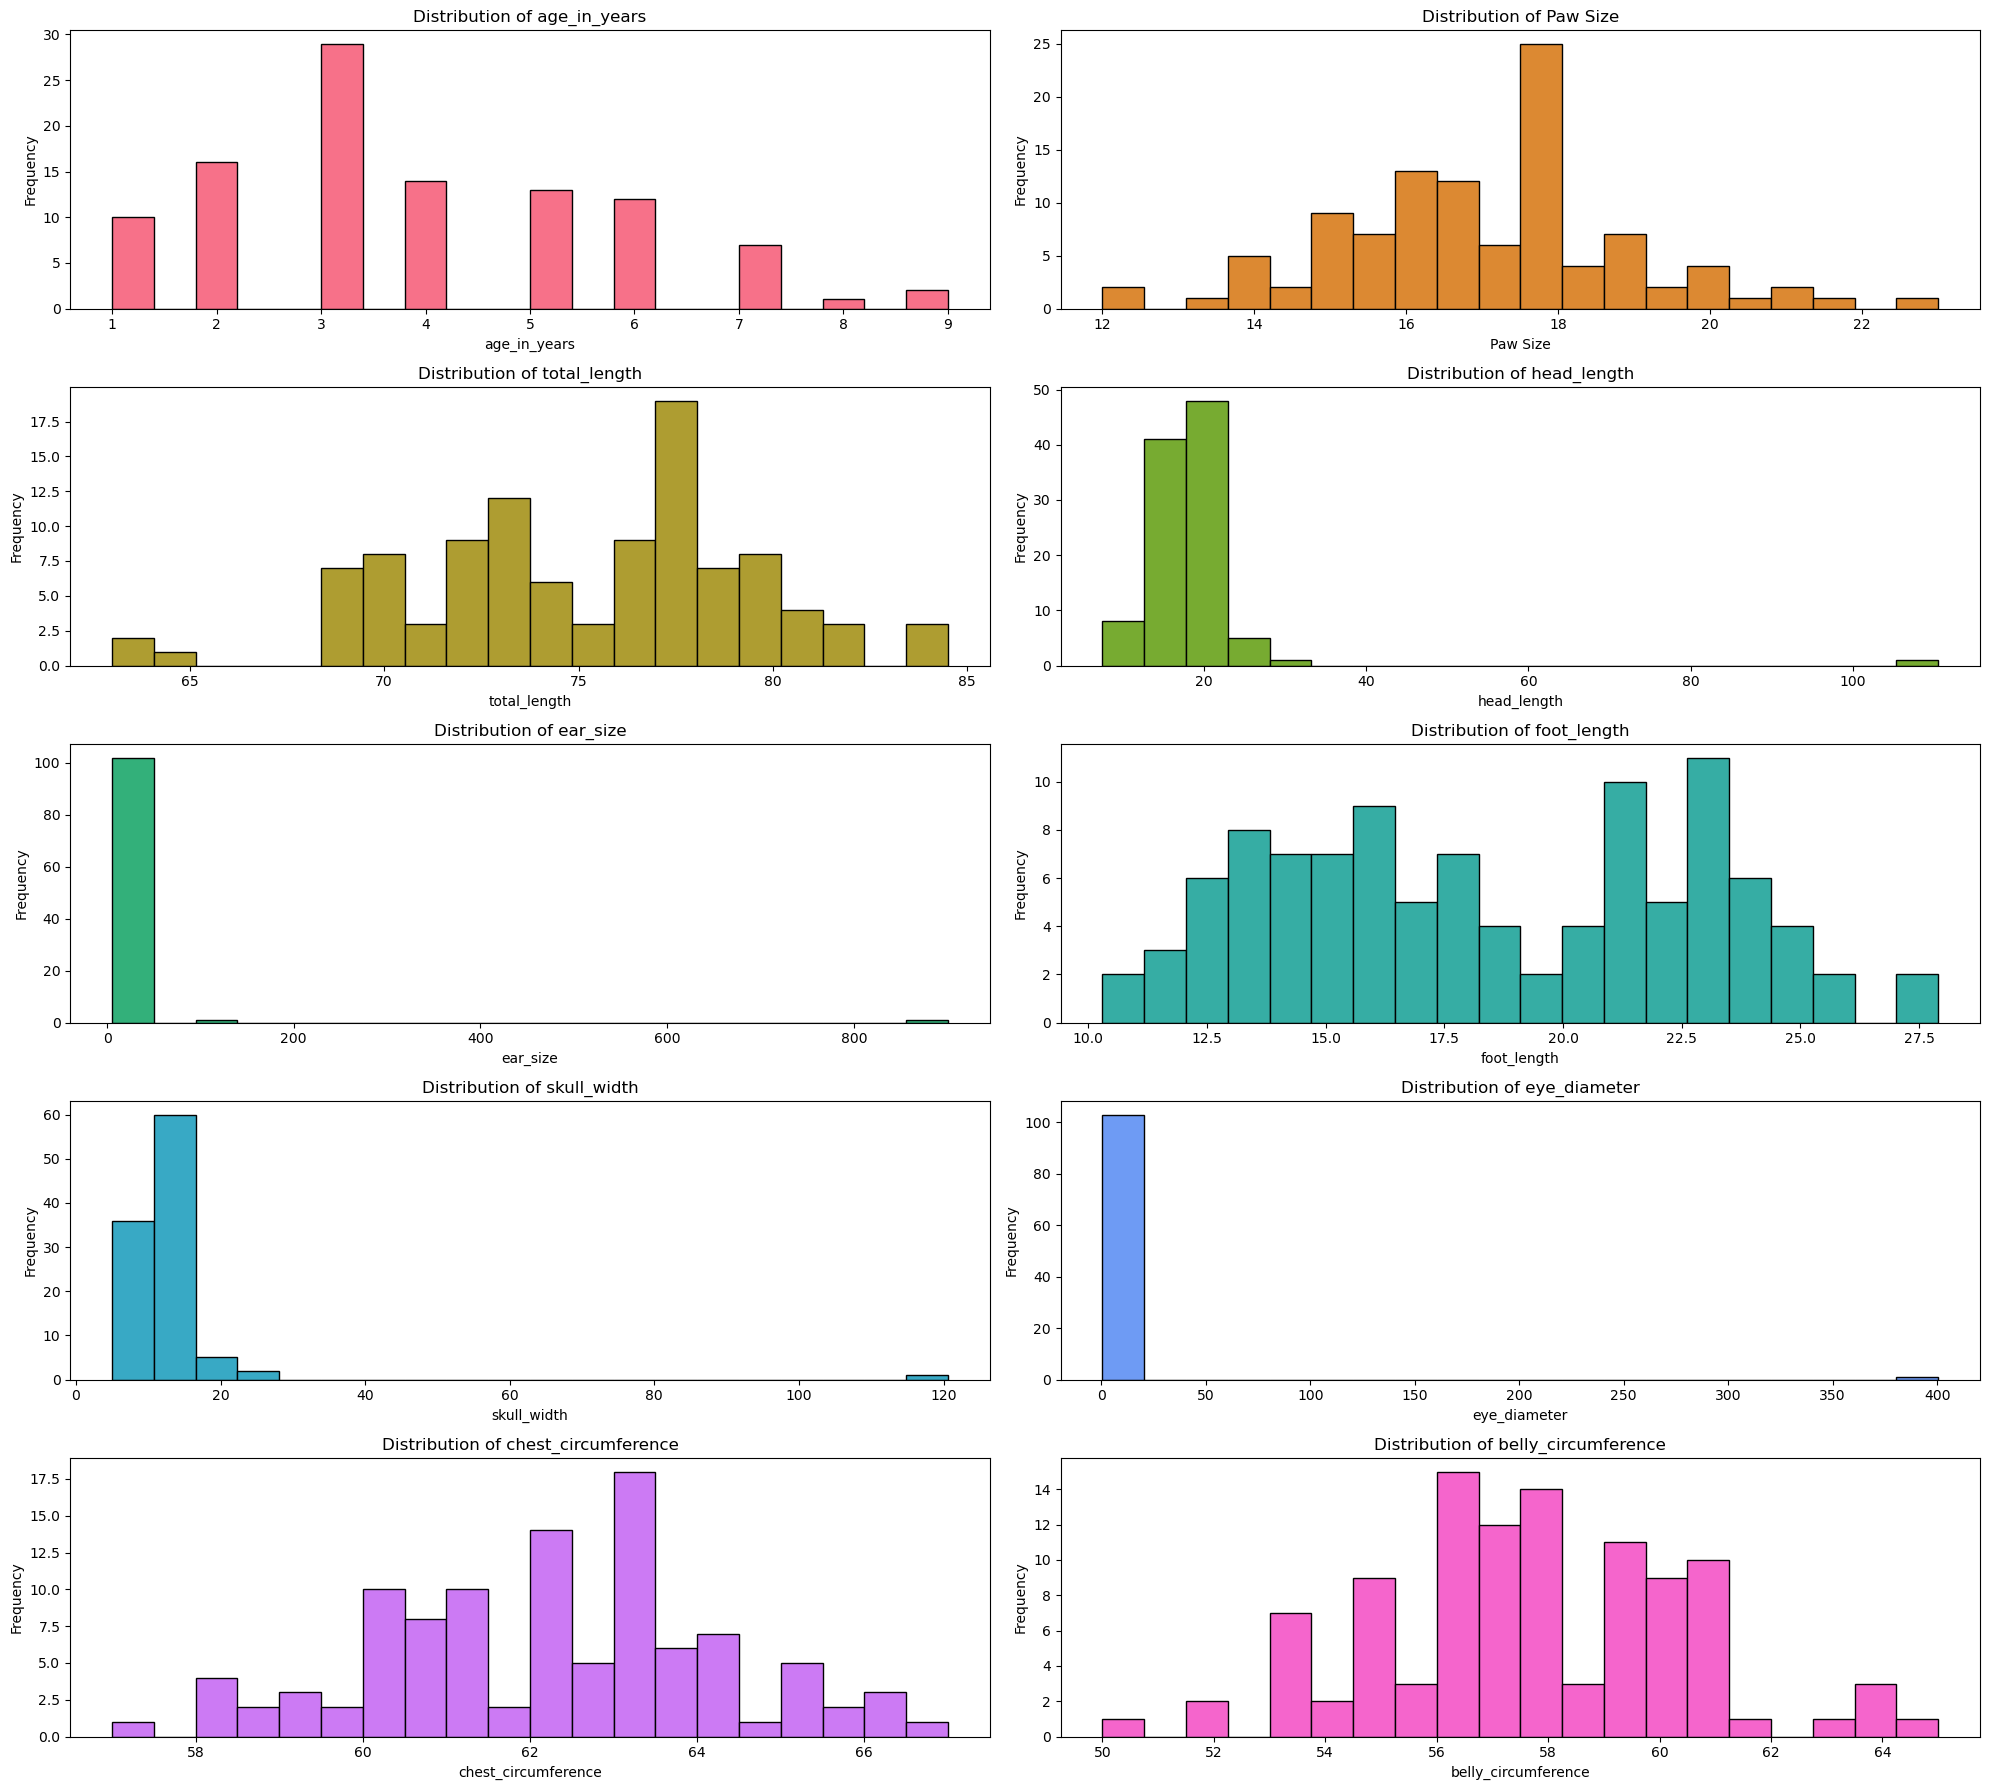

In [23]:
# Creating histograms for each numerical column using an automatic color palette
plt.figure(figsize=(20, 18))

numerical_columns = ["age_in_years", "Paw Size", "total_length", "head_length", "ear_size", "foot_length", 
                     "skull_width", "eye_diameter", "chest_circumference", "belly_circumference"]

palette = sns.color_palette("husl", len(numerical_columns))

# Creating subplots for each numerical column
for i, (column, color) in enumerate(zip(numerical_columns, palette), 1):
    plt.subplot(5, 2, i)
    plt.hist(koala_data[column], bins=20, color=color, edgecolor='black')
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

In [24]:
# Calculating the skewness of numerical columns in a dataset
def calculate_skewness(dataset, columns):
    skewness_values = {}
    for column in columns:
        skewness_values[column] = dataset[column].skew()
    return skewness_values

skewness_results = calculate_skewness(koala_data, numerical_columns)

print("Skewness of each column in the dataset: \n", skewness_results)

Skewness of each column in the dataset: 
 {'age_in_years': 0.5654509623469088, 'Paw Size': 0.16786870303351742, 'total_length': -0.285265771534212, 'head_length': 8.233721013431943, 'ear_size': 9.992993956629151, 'foot_length': 0.09752005197842935, 'skull_width': 9.023199537166153, 'eye_diameter': 10.188535641454523, 'chest_circumference': -0.05551075216583214, 'belly_circumference': 0.07928982292860946}


### Checking for outliers

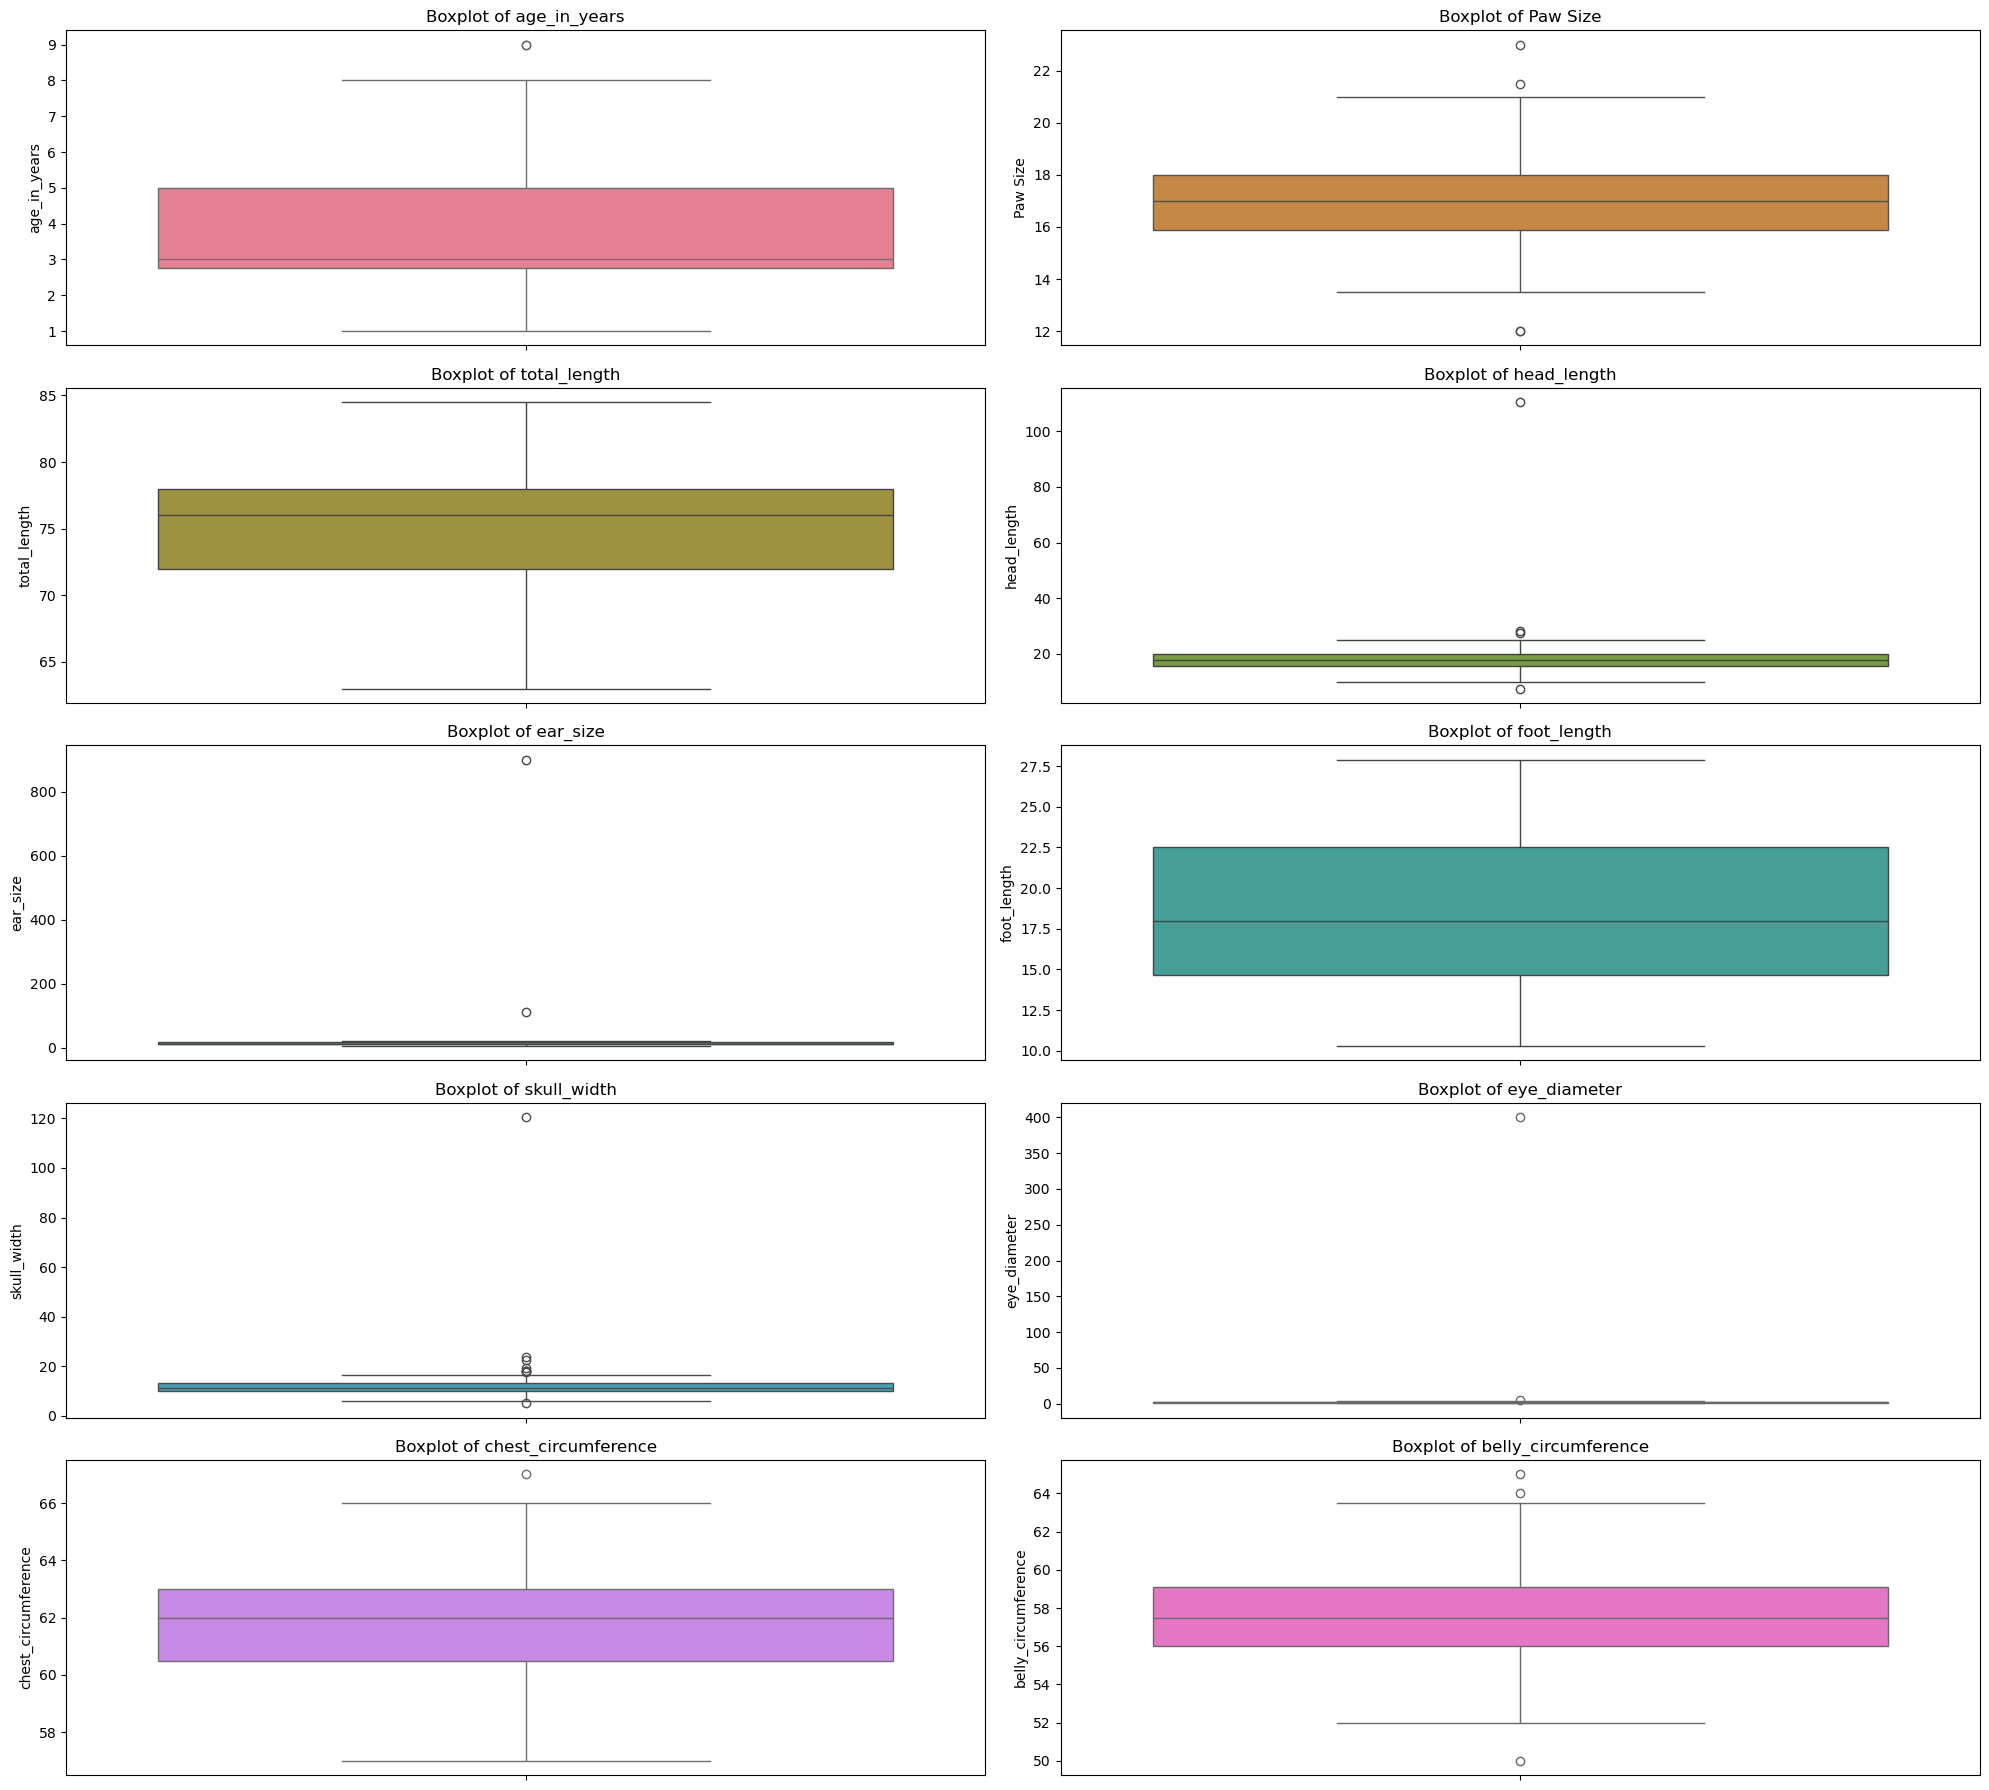

In [26]:
# Creating boxplots for all numerical columns with an automatic color palette
plt.figure(figsize=(20, 18))

# Creating subplots for each numerical column
for i, (column, color) in enumerate(zip(numerical_columns, palette), 1):
    plt.subplot(5, 2, i)
    sns.boxplot(y=koala_data[column], color=color)
    plt.title(f"Boxplot of {column}")
    plt.ylabel(column)

plt.tight_layout()
plt.show()

In [27]:
# Getting the outliers and count them in each column based on IQR
def get_outliers_with_count(dataset, column):
    Q1 = dataset[column].quantile(0.25)
    Q3 = dataset[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = dataset[(dataset[column] < lower_bound) | (dataset[column] > upper_bound)][column]
    return outliers, len(outliers)

columns_with_outliers = ["age_in_years", "Paw Size", "head_length", "ear_size", "skull_width", 
                         "eye_diameter", "chest_circumference", "belly_circumference"]

outliers_info = {}

for column in columns_with_outliers:
    outliers_info[column] = get_outliers_with_count(koala_data, column)

for column, (outliers, count) in outliers_info.items():
    print(f"{column}: {count} outliers")
    print(outliers)
    print("\n")


age_in_years: 2 outliers
8     9.0
10    9.0
Name: age_in_years, dtype: float64


Paw Size: 4 outliers
41    12.0
42    12.0
53    23.0
86    21.5
Name: Paw Size, dtype: float64


head_length: 4 outliers
54     28.1
58     27.5
72      7.5
77    110.5
Name: head_length, dtype: float64


ear_size: 2 outliers
57    110.4
89    900.8
Name: ear_size, dtype: float64


skull_width: 9 outliers
14    120.6
16     22.7
47     18.2
53     18.0
54     18.2
57     19.2
58     17.8
78      5.0
97     23.6
Name: skull_width, dtype: float64


eye_diameter: 2 outliers
53    400.5
75      4.8
Name: eye_diameter, dtype: float64


chest_circumference: 1 outliers
58    67.0
Name: chest_circumference, dtype: float64


belly_circumference: 3 outliers
20    65.0
38    50.0
56    64.0
Name: belly_circumference, dtype: float64




### Handling the outliers

In [29]:
# Function to replace outliers based on IQR without using lambda
def replace_outliers(dataset, column, replacement_value):
    Q1 = dataset[column].quantile(0.25)
    Q3 = dataset[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace values below the lower bound and above the upper bound with the replacement value
    dataset.loc[dataset[column] < lower_bound, column] = replacement_value
    dataset.loc[dataset[column] > upper_bound, column] = replacement_value

# Replace 'age_in_years' outliers with the median
replace_outliers(koala_data, "age_in_years", koala_data["age_in_years"].median())

# Replace 'Paw Size' outliers with the mean
replace_outliers(koala_data, "Paw Size", koala_data["Paw Size"].mean())

# Replace 'head_length' outliers with the median
replace_outliers(koala_data, "head_length", koala_data["head_length"].median())

# Replace 'ear_size' outliers with the median
replace_outliers(koala_data, "ear_size", koala_data["ear_size"].median())

# Replace 'skull_width' outliers with the median
replace_outliers(koala_data, "skull_width", koala_data["skull_width"].median())

# Replace 'eye_diameter' outliers with the median
replace_outliers(koala_data, "eye_diameter", koala_data["eye_diameter"].median())

# Replace 'chest_circumference' outliers with the mean
replace_outliers(koala_data, "chest_circumference", koala_data["chest_circumference"].mean())

# Replace 'belly_circumference' outliers with the mean (57.5)
replace_outliers(koala_data, "belly_circumference", koala_data["belly_circumference"].mean())

# Display the modified data to check the changes
koala_data.describe()

,age_in_years,Paw Size,total_length,head_length,ear_size,foot_length,skull_width,eye_diameter,chest_circumference,belly_circumference
count,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,3.701923,17.005178,75.088462,17.572115,13.155769,18.451923,11.348077,2.025962,61.951923,57.521588
std,1.750893,1.675777,4.310549,3.065434,4.096217,4.374412,2.117426,0.926419,1.984796,2.476044
min,1.000000,13.500000,63.000000,9.700000,5.300000,10.300000,6.000000,0.500000,57.000000,52.000000
25%,2.750000,16.000000,72.000000,15.925000,9.875000,14.650000,10.000000,1.400000,60.500000,56.000000
50%,3.000000,17.000000,76.000000,17.850000,11.850000,17.950000,11.300000,1.900000,62.000000,57.500000
75%,5.000000,18.000000,78.000000,19.425000,17.000000,22.500000,12.600000,2.550000,63.000000,59.000000
max,8.000000,21.000000,84.500000,24.900000,21.200000,27.900000,16.500000,4.400000,66.000000,63.500000


### Rechecking the distribution and skewness after handling the outliers

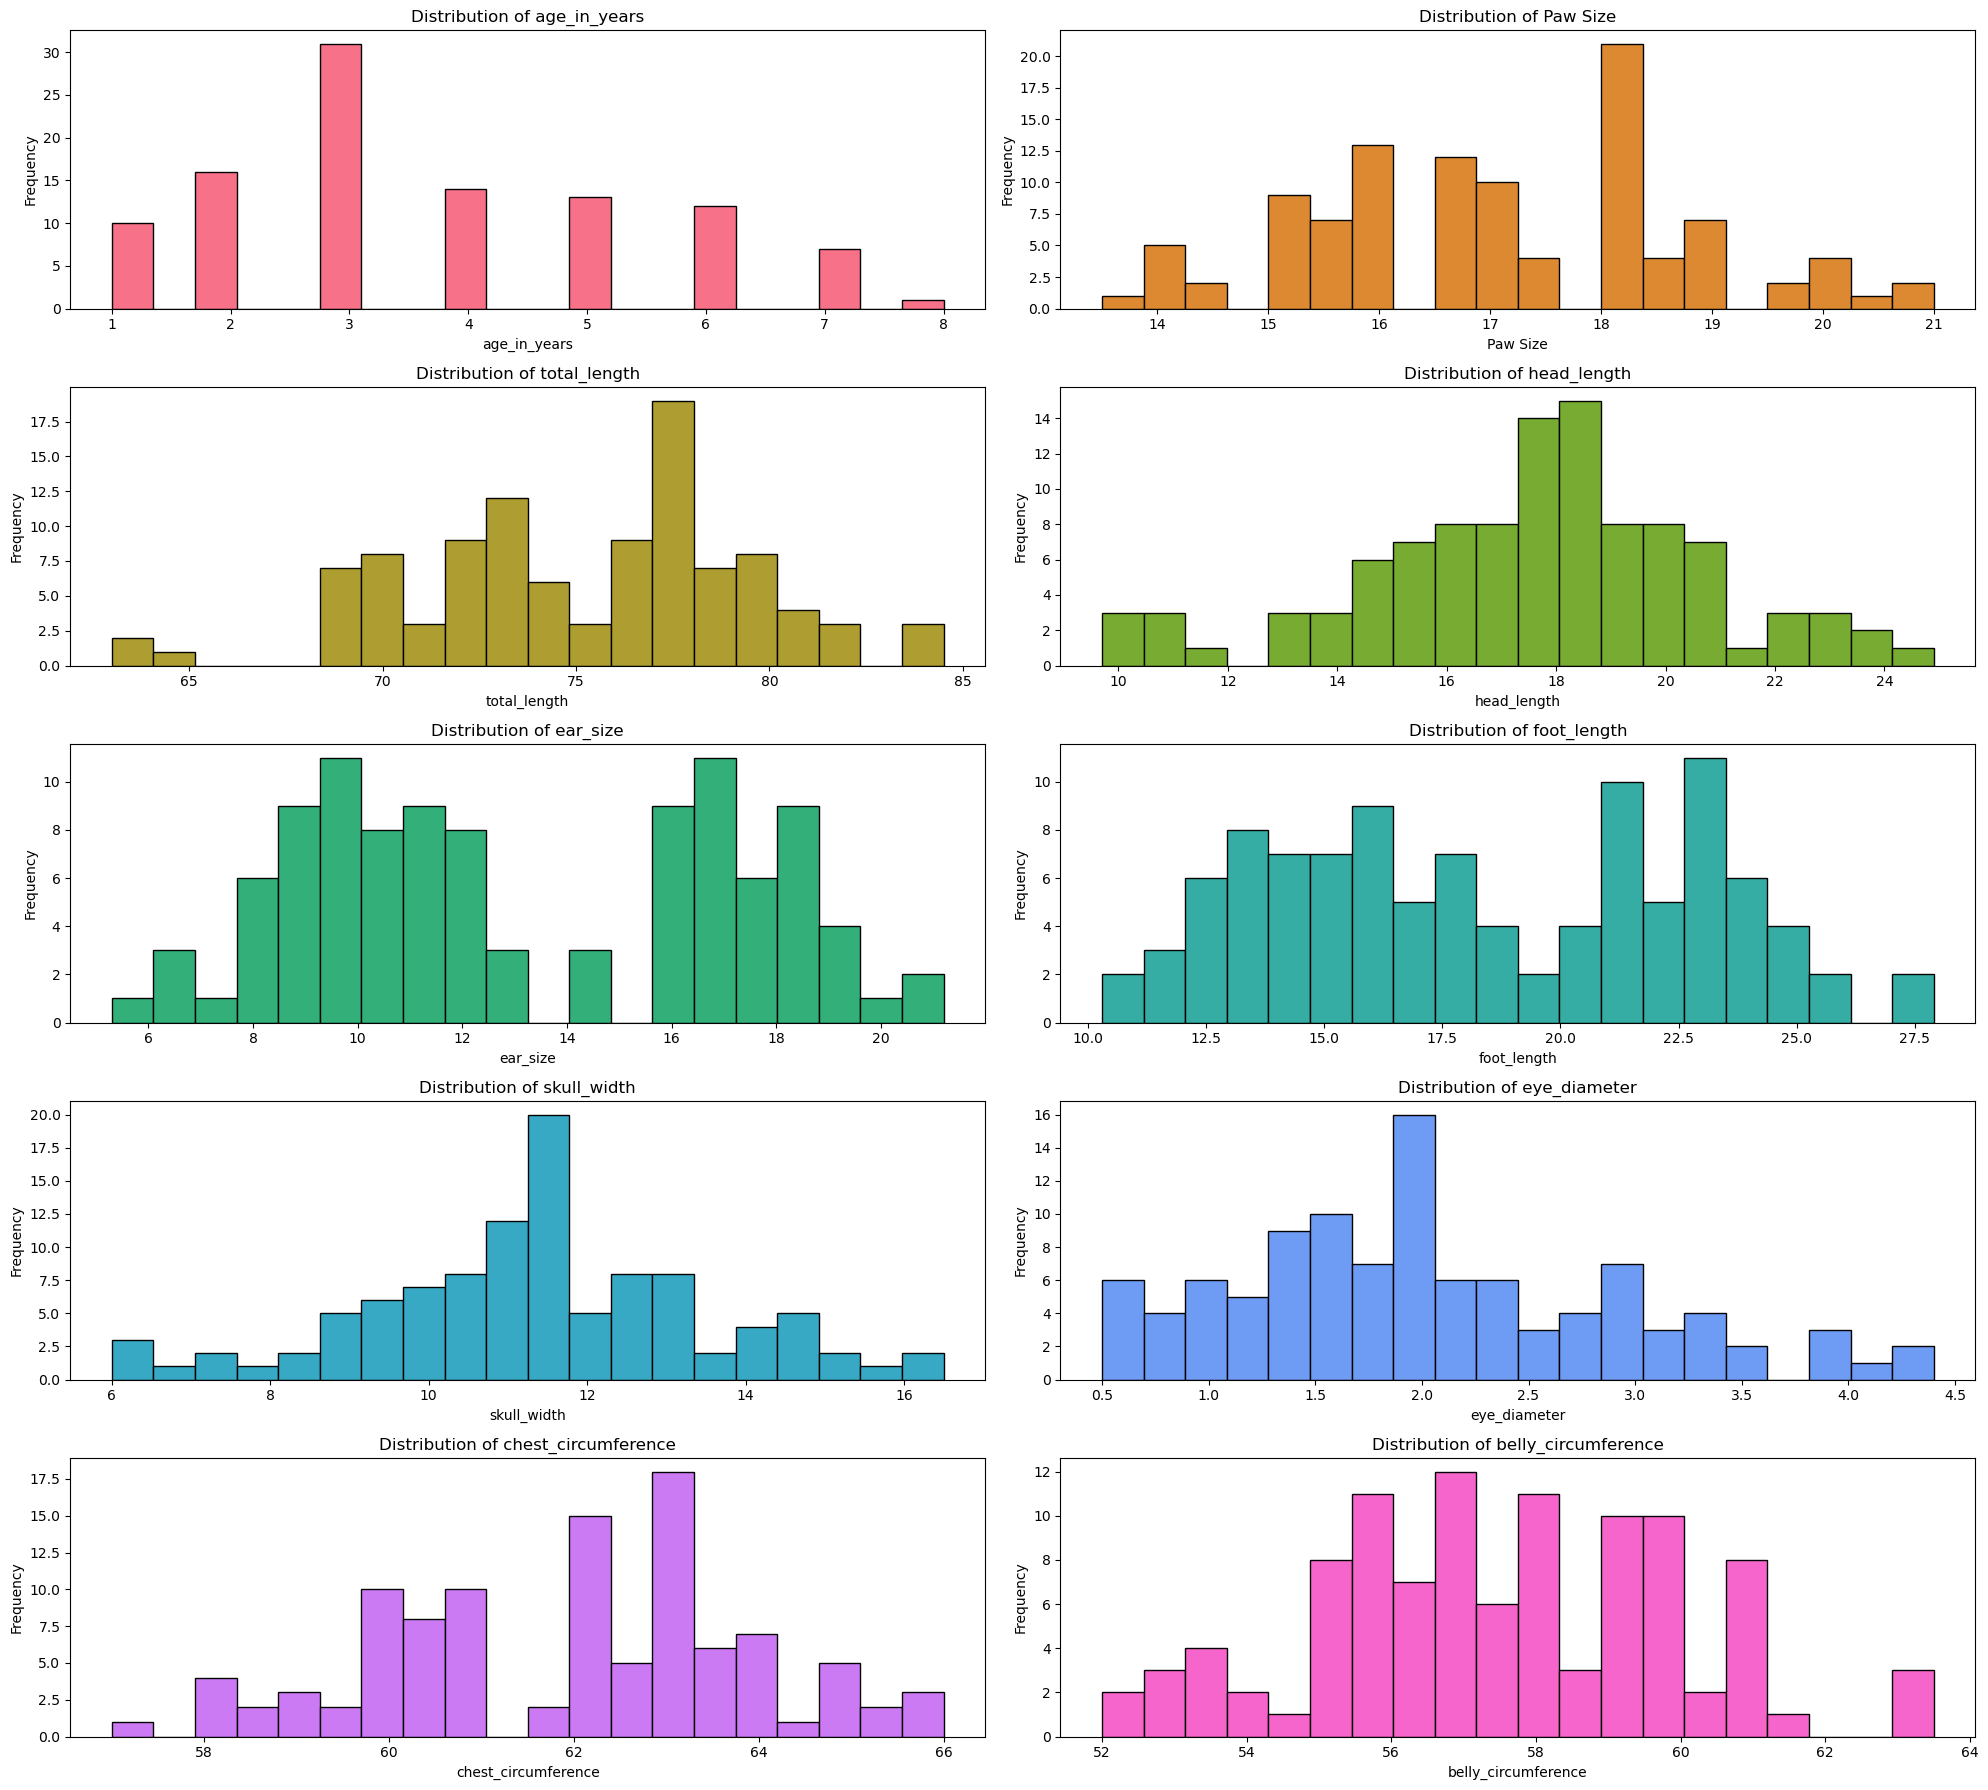

In [31]:
# Creating histograms for each numerical column using an automatic color palette
plt.figure(figsize=(20, 18))

# Creating subplots for each numerical column
for i, (column, color) in enumerate(zip(numerical_columns, palette), 1):
    plt.subplot(5, 2, i)
    plt.hist(koala_data[column], bins=20, color=color, edgecolor="black")
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

In [32]:
# Calculating the skewness of numerical columns in a dataset
def calculate_skewness(dataset, columns):
    skewness_values = {}
    for column in columns:
        skewness_values[column] = dataset[column].skew()
    return skewness_values

numerical_columns = ["age_in_years", "Paw Size", "total_length", "head_length", "ear_size", "foot_length",
                     "skull_width", "eye_diameter", "chest_circumference", "belly_circumference"]

skewness_results = calculate_skewness(koala_data, numerical_columns)

print("Skewness of each column in the dataset after handling outliers: \n", skewness_results)

Skewness of each column in the dataset after handling outliers: 
 {'age_in_years': 0.40225832745280016, 'Paw Size': 0.16277528393632118, 'total_length': -0.285265771534212, 'head_length': -0.35610193694048464, 'ear_size': 0.14316798966263955, 'foot_length': 0.09752005197842935, 'skull_width': -0.05764963750413925, 'eye_diameter': 0.5733808940339137, 'chest_circumference': -0.1449181768674593, 'belly_circumference': 0.02990136633918795}


### Handling misspelled values

#### "habitat"

In [35]:
# Checking for misspelled values in 'habitat'
unique_habitat_values = koala_data["habitat"].unique()
habitat_counts = koala_data['habitat'].value_counts()
print("Unique values of habitat: ", unique_habitat_values, habitat_counts)

Unique values of habitat:  ['VIC', 'VICtoria', 'Vic', 'QLD', 'Queensland', 'Queenstown', 'qld', 'q']
Categories (8, object): ['QLD', 'Queensland', 'Queenstown', 'VIC', 'VICtoria', 'Vic', 'q', 'qld'] habitat
QLD           54
VIC           44
Queensland     1
Queenstown     1
VICtoria       1
Vic            1
q              1
qld            1
Name: count, dtype: int64


In [36]:
# Fixing the misspelled values in 'habitat'
target_habitat_vic_values = ["VIC", "VICtoria", "Vic"]
koala_data.loc[koala_data["habitat"].isin(target_habitat_vic_values), "habitat"] = "VIC"

target_habitat_qld_values = ["QLD", "Queensland", "qld", "Queenstown", "q"]
koala_data.loc[koala_data["habitat"].isin(target_habitat_qld_values), "habitat"] = "QLD"

# Removing unused categories
koala_data["habitat"] = koala_data["habitat"].cat.remove_unused_categories()

In [37]:
# Checking for misspelled values in 'habitat'
unique_habitat_values = koala_data["habitat"].unique()
print("Unique values of habitat: ", unique_habitat_values)

Unique values of habitat:  ['VIC', 'QLD']
Categories (2, object): ['QLD', 'VIC']


#### "gender"

In [39]:
# Checking for misspelled values in 'gender'
unique_gender_values = koala_data["gender"].unique()
print("Unique values of gender: ", unique_gender_values)

Unique values of gender:  ['m', 'f', 'female', 'male']
Categories (4, object): ['f', 'female', 'm', 'male']


In [40]:
# Fixing the misspelled values in 'gender'
target_gender_male_values = ["male", "m"]
koala_data.loc[koala_data["gender"].isin(target_gender_male_values), "gender"] = "male"

target_gender_female_values = ["female", "f"]
koala_data.loc[koala_data["gender"].isin(target_gender_female_values), "gender"] = "female"

# Removing unused categories
koala_data["gender"] = koala_data["gender"].cat.remove_unused_categories()

In [41]:
# Checking for misspelled values in 'gender'
unique_gender_values = koala_data["gender"].unique()
print("Unique values of gender: ", unique_gender_values)

Unique values of gender:  ['male', 'female']
Categories (2, object): ['female', 'male']


### One-Hot Encoding of categorical columns

In [43]:
# One-hot encoding the 'habitat' column
one_hot_habitat = pd.get_dummies(koala_data["habitat"], prefix="habitat")

# One-hot encoding the 'gender' column
one_hot_gender = pd.get_dummies(koala_data["gender"], prefix="gender")

one_hot_habitat = one_hot_habitat.astype(int)
one_hot_gender = one_hot_gender.astype(int)

# Concatenate the original DataFrame with the one-hot encoded columns
koala_data_encoded = pd.concat([koala_data, one_hot_habitat, one_hot_gender], axis=1)

# Display the one-hot encoded DataFrame
print("One-Hot Encoded DataFrame: \n", koala_data_encoded.head())

One-Hot Encoded DataFrame: 
   koala_id region habitat  gender  age_in_years  Paw Size  total_length  \
0        1      1     VIC    male           8.0      16.0          77.0   
1        2      1     VIC  female           6.0      16.5          79.5   
2        3      1     VIC  female           6.0      19.0          83.5   
3        4      1     VIC  female           6.0      18.0          80.0   
4        5      1     VIC  female           2.0      16.0          73.5   

   head_length  ear_size  foot_length  skull_width  eye_diameter  \
0         19.1      19.5         24.5         15.4           2.2   
1         17.5      16.2         22.5         12.6           3.0   
2         19.0      16.9         25.4         15.0           2.5   
3         18.2      17.2         26.1         12.1           2.2   
4         16.5      18.2         21.0         11.3           2.1   

   chest_circumference  belly_circumference  habitat_QLD  habitat_VIC  \
0                 63.0                

### Data Cleaning Approach

To ensure the dataset was suitable for analysis, I undertook a thorough data cleaning process that involved several key steps:

1. **Data Type Conversion:**
   I first converted the data types of each column according to their respective characteristics. The categorical columns, such as **region**, **habitat**, and **gender**, were converted to categorical data types, while the numeric columns were retained for further analysis.

2. **Handling Duplicates:**
   I checked for duplicate entries using the **koala_id** as the unique identifier for each koala. No duplicates were found, ensuring that the dataset was unique and not compromised by redundancy.

3. **Missing Value Imputation:**
   Upon inspecting the dataset for missing values, I found that several columns, including **age_in_years**, **foot_length**, **skull_width**, and **belly_circumference**, had missing data. After evaluating the distribution of each of these columns, I decided to impute the missing values using the **median** of each respective column to minimize the impact of outliers and skewed distributions.

4. **Assessing Distribution and Skewness:**
   Next, I checked the distribution of numeric columns to evaluate whether the data was skewed. I calculated the skewness for each column and noted the presence of skewed data in several columns. For those columns with significant skewness, I proceeded to check for outliers.

5. **Handling Outliers:**
   Outliers were detected in almost all numeric columns except for **total_length** and **foot_length**. Based on the skewness of the data, I replaced outliers with either the **mean** (for fairly symmetric distributions) or the **median** (for skewed distributions). This ensured that the dataset remained representative without being overly influenced by extreme values. After replacing the outliers, I reassessed the descriptive statistics and skewness to confirm that the data was now more balanced.

6. **Post-Outlier Distribution Check:**
   After handling outliers, I re-evaluated the distribution of each column. Only **eye_diameter** showed moderate skewness (0.57), but I determined that this was acceptable, and no transformation was applied.

7. **Correcting Misspelled Values:**
   There were misspelled values in the **habitat** and **gender** columns (e.g., variations in spelling for regions). I standardized these values to ensure consistency in the categorical data.

8. **One-Hot Encoding for Categorical Data:**
   Finally, I applied **one-hot encoding** to the **habitat** and **gender** columns to convert these categorical variables into a numerical format. This step was crucial for ensuring that these variables could be used in further statistical and regression analyses.

Through this structured approach, I ensured the dataset was clean, free from inconsistencies, and well-prepared for the analsis in subsequent sections.


In [45]:
# Rename the 'Paw Size' column to remove spaces
koala_data_encoded = koala_data_encoded.rename(columns={"Paw Size": "paw_size"})

encoded_numerical_columns = ["region", "habitat_VIC", "habitat_QLD", "gender_female", "gender_male", 
                             "age_in_years", "paw_size", "total_length", "head_length", "ear_size", "foot_length", 
                             "skull_width", "eye_diameter", "chest_circumference", "belly_circumference"]

<Figure size 2400x2000 with 0 Axes>

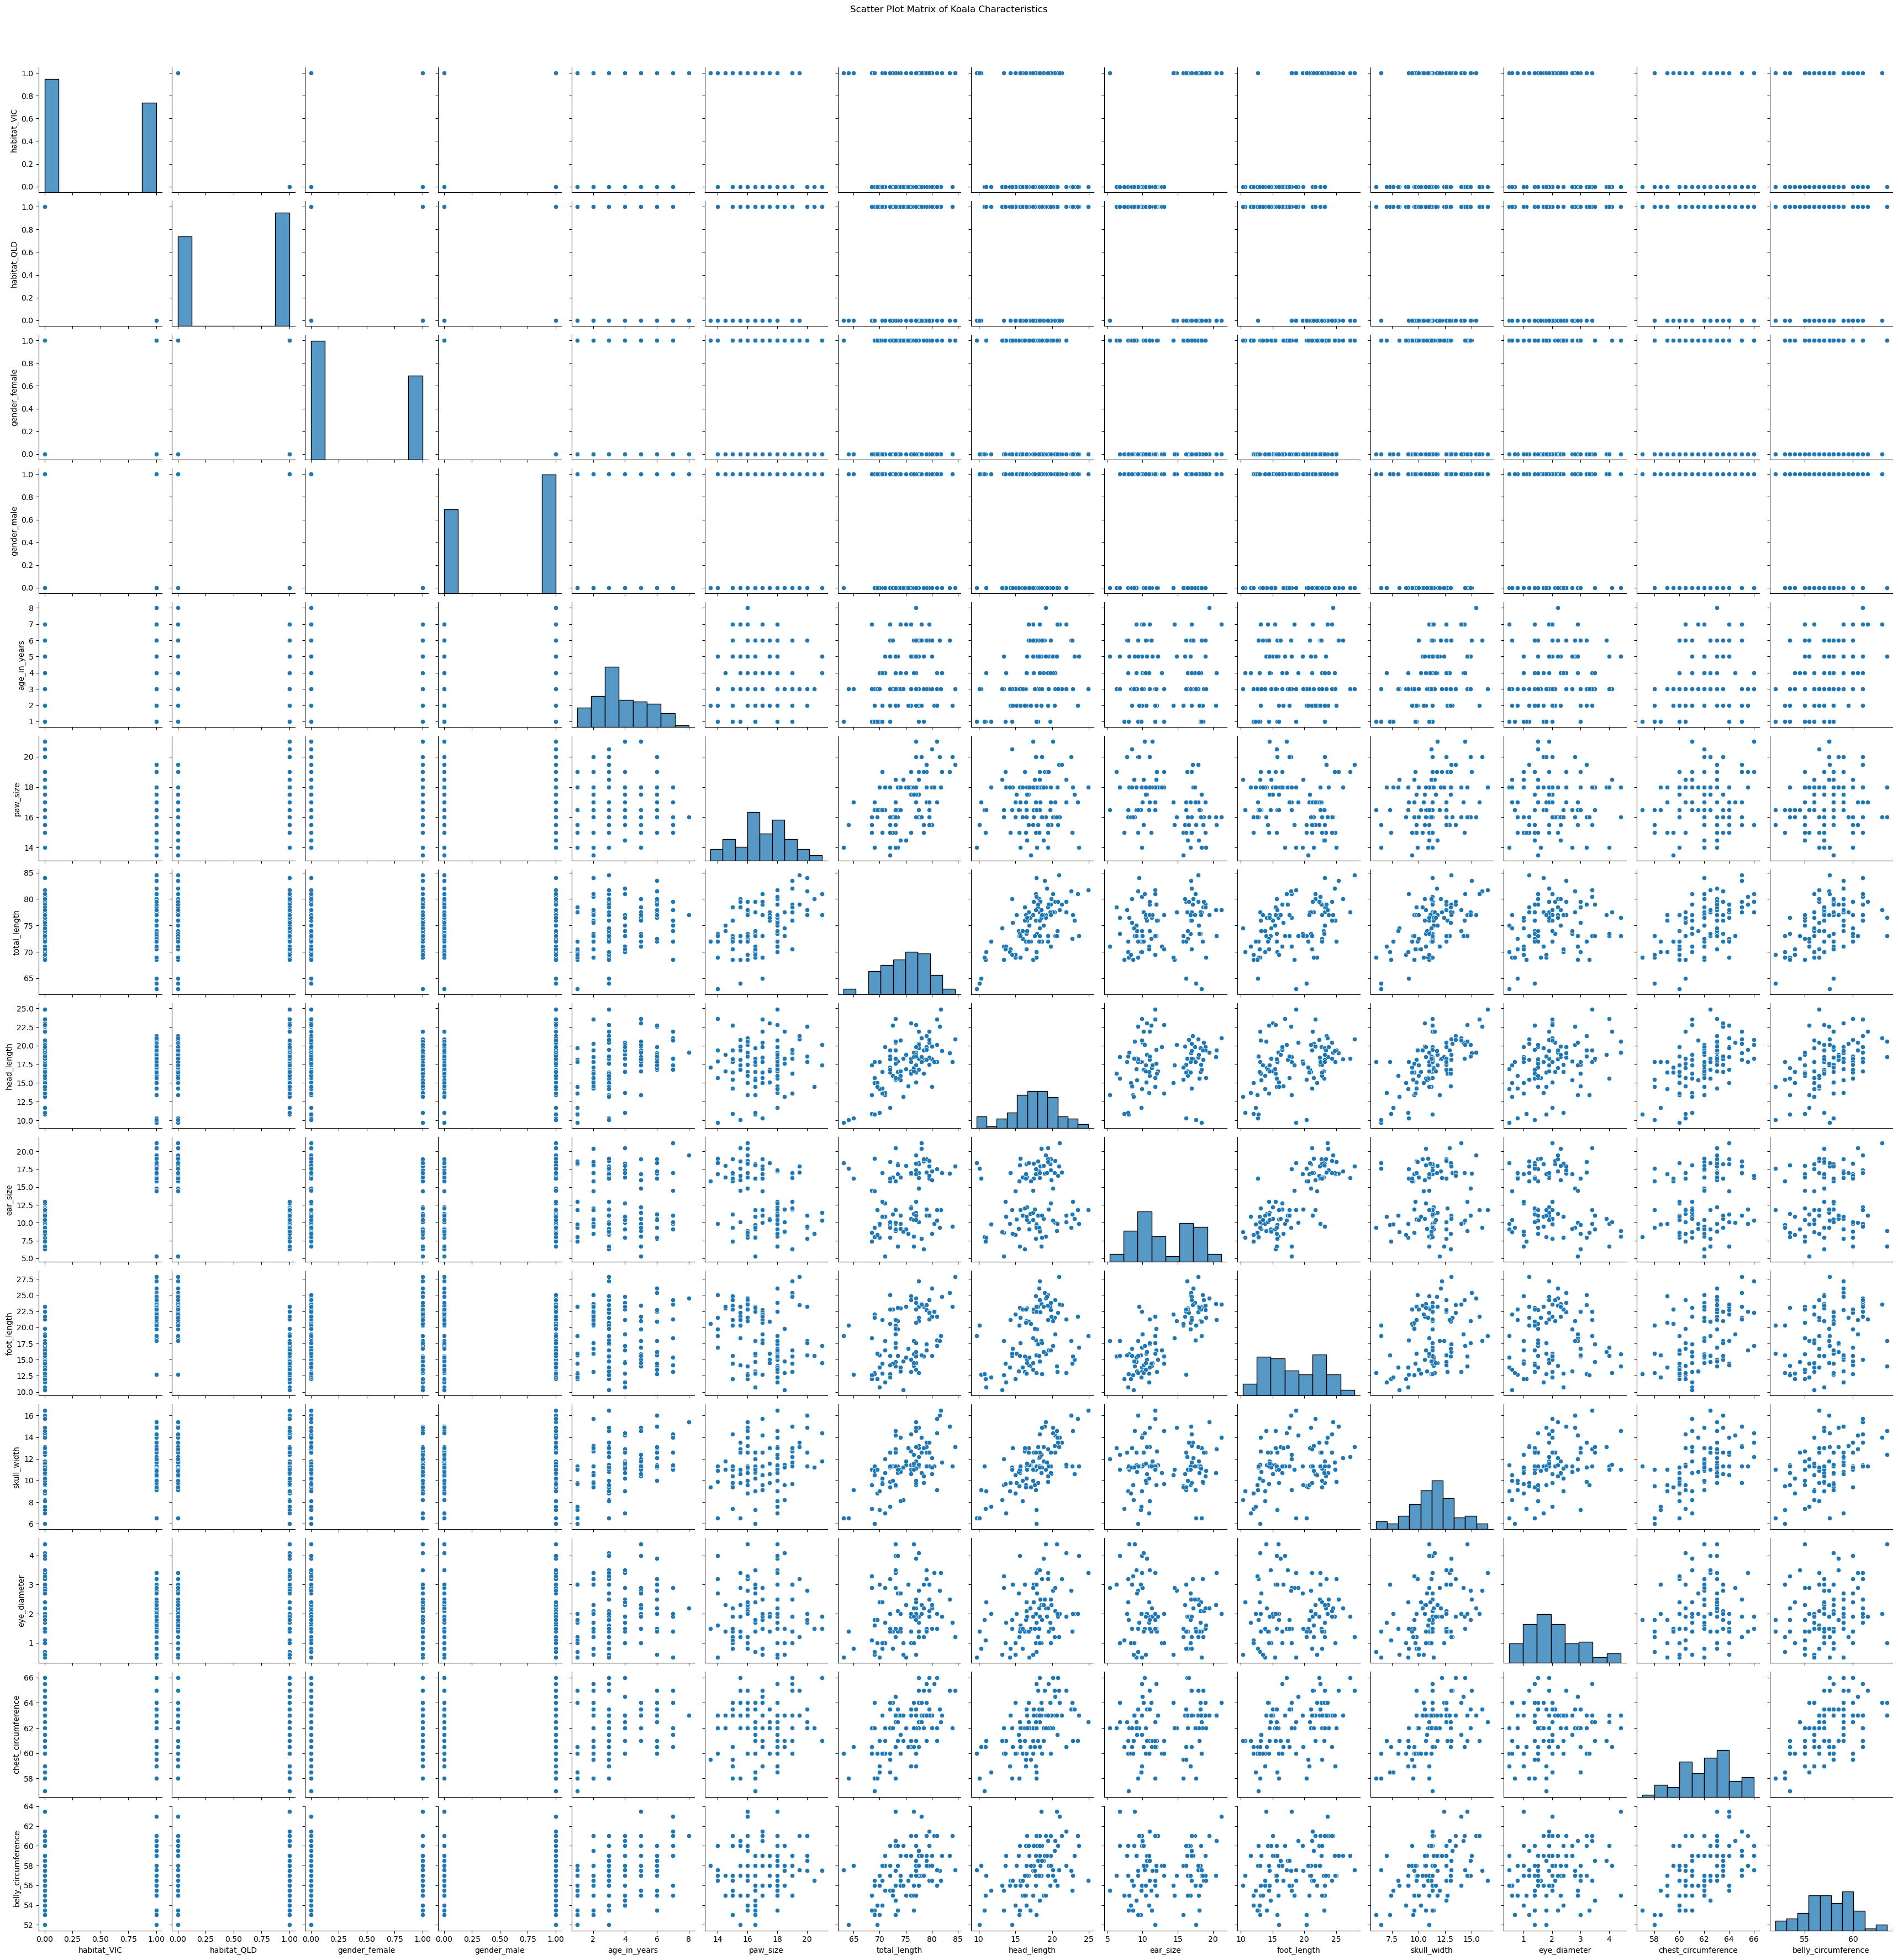

In [46]:
# Creating the pair plot
plt.figure(figsize=(24, 20))
sns.pairplot(koala_data_encoded[encoded_numerical_columns])
plt.suptitle("Scatter Plot Matrix of Koala Characteristics", y=1.02)
plt.show()

### Visual Summary
As we observe the scatter pair plot, several patterns emerge:

- **Habitat Influence**: Koalas from Victoria and Queensland show distinct physical adaptations, with **Victorian koalas** exhibiting larger **ear sizes** and **foot lengths**, while **Queensland koalas** display larger **paw sizes**. These differences reflect region-specific adaptations.

- **Gender Differences**: Female koalas tend to have slightly larger **total body lengths**, **paw sizes**, and **chest circumferences**, while males tend to cluster toward smaller values for these traits. However, the differences are not pronounced.

- **Age and Growth**: Older koalas exhibit proportional growth across several physical traits, with strong upward trends in **head length**, **skull width**, and **chest circumference**. These traits tend to increase as koalas age, indicating steady physical development.

- **Proportional Relationships**: Physical traits like **head length**, **total length**, **skull width**, and **chest circumference** show strong positive correlations, confirming that these traits grow proportionally as koalas increase in size.

- **Eye Diameter**: Although **eye diameter** has some positive correlations with other traits, it does not exhibit strong patterns or clear relationships compared to other physical charactrs, and ages.


In [48]:
corr_matrix = koala_data_encoded[encoded_numerical_columns].corr()
corr_matrix

,region,habitat_VIC,habitat_QLD,gender_female,gender_male,age_in_years,paw_size,total_length,head_length,ear_size,foot_length,skull_width,eye_diameter,chest_circumference,belly_circumference
region,1.000000,-0.892326,0.892326,-0.232817,0.232817,-0.060488,0.361789,-0.260843,-0.161302,-0.785917,-0.780625,-0.135510,-0.057048,-0.359982,-0.189564
habitat_VIC,-0.892326,1.000000,-1.000000,0.195811,-0.195811,0.007906,-0.455286,0.078666,0.007506,0.880670,0.787426,0.012756,-0.125873,0.222606,0.052408
habitat_QLD,0.892326,-1.000000,1.000000,-0.195811,0.195811,-0.007906,0.455286,-0.078666,-0.007506,-0.880670,-0.787426,-0.012756,0.125873,-0.222606,-0.052408
gender_female,-0.232817,0.195811,-0.195811,1.000000,-1.000000,-0.002047,0.108732,0.160200,-0.116493,0.086704,0.120953,-0.009890,-0.148594,0.163770,0.073826
gender_male,0.232817,-0.195811,0.195811,-1.000000,1.000000,0.002047,-0.108732,-0.160200,0.116493,-0.086704,-0.120953,0.009890,0.148594,-0.163770,-0.073826
age_in_years,-0.060488,0.007906,-0.007906,-0.002047,0.002047,1.000000,0.038520,0.233533,0.369077,-0.018100,0.031068,0.435998,0.202935,0.317117,0.357962
paw_size,0.361789,-0.455286,0.455286,0.108732,-0.108732,0.038520,1.000000,0.481302,0.109463,-0.388698,-0.204112,0.273990,0.005379,0.135148,0.118366
total_length,-0.260843,0.078666,-0.078666,0.160200,-0.160200,0.233533,0.481302,1.000000,0.634559,0.153644,0.443706,0.602056,0.205051,0.545029,0.397185
head_length,-0.161302,0.007506,-0.007506,-0.116493,0.116493,0.369077,0.109463,0.634559,1.000000,0.149266,0.345818,0.646954,0.352112,0.523890,0.418198
ear_size,-0.785917,0.880670,-0.880670,0.086704,-0.086704,-0.018100,-0.388698,0.153644,0.149266,1.000000,0.775407,0.053753,-0.173386,0.226149,0.097228


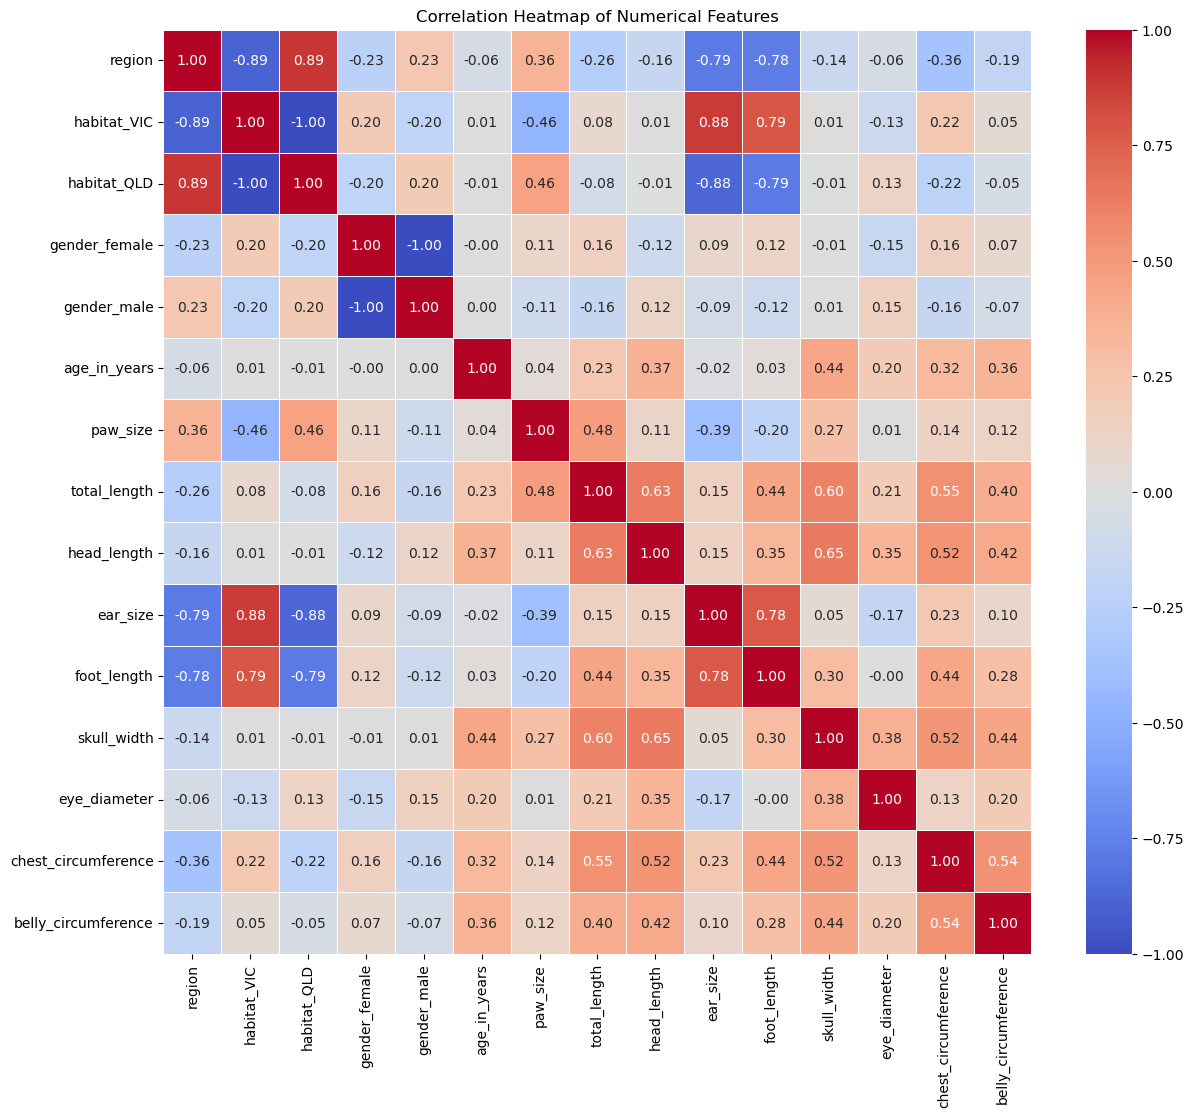

In [49]:
# Correlation matrix of numerical columns
plt.figure(figsize=(14,12))

# Creating a heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", annot_kws={"size": 10}, linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

## Analysis of the Koala Dataset Based on Correlations

This analysis focuses on key relationships between **region, habitat, gender, age**, and **physical characteristics** based on the correlation matrix provided. The goal is to summarize important patterns without diving too deeply into specific ecological or biological contexts.

### 1. Region and Physical Characteristics:

- **Region**:
    - **Region** is negatively correlated with both **habitat_VIC** (-0.89) and **ear size** (-0.79), indicating that koalas in regions closely associated with Victoria tend to have larger ears.
    - **Region** is positively correlated with **habitat_QLD** (0.89) and **paw size** (0.36), suggesting that koalas in Queensland regions have larger paws but smaller ears and feet.
    - The strong negative correlation between **region** and **habitat_VIC** reflects the exclusivity of these geographical divisions, where regions associated with Queensland have contrasting physical traits compared to those in Victoria.

### 2. Habitat and Physical Characteristics:

- **habitat_VIC**:
    - **Ear_size** (0.88) and **foot_length** (0.79) are positively correlated with koalas from Victoria, suggesting that koalas in this region generally have larger ears and feet. These traits may be adaptations to the environmental conditions in Victoria.
    - **Paw_size** (-0.46) is negatively correlated with the Victoria habitat, implying that koalas from this region tend to have smaller paws compared to those from other regions.

- **habitat_QLD**:
    - **Ear_size** (-0.88) and **foot_length** (-0.79) are negatively correlated with Queensland koalas, suggesting that koalas in this region have smaller ears and feet. This may reflect adaptations to Queensland’s climate or tree density.
    - **Paw_size** (0.46) is positively correlated, indicating that Queensland koalas tend to have larger paws compared to those from Victoria.

### 3. Gender Differences:

- **Gender (female/male)**:
    - **Total_length** shows a slight positive correlation with **gender_female** (0.16) and a slight negative correlation with **gender_male** (-0.16), indicating that female koalas might have slightly longer body sizes compared to males.
    - **Paw_size** follows a similar pattern, with females having slightly larger paws (0.11) compared to males (-0.11).
    - **Chest_circumference** also shows a positive correlation for females (0.16), suggesting that females might have slightly larger chest sizes, which could be related to biological differences such as reproductive roles.

### 4. Age and Physical Characteristics:

- **age_in_years**:
    - **Head_length** (0.37) and **skull_width** (0.44) are positively correlated with age, indicating that as koalas grow older, their head length and skull width increase. This reflects a natural growth pattern where koalas continue to grow their cranial structures as they mature.
    - **Chest_circumference** (0.32) and **belly_circumference** (0.36) also show positive correlations with age, meaning older koalas tend to have larger chest and belly sizes.

### 5. Interrelations Among Physical Characteristics:

- **Head Length and Other Traits**:
    - **Total_length** (0.63) is strongly correlated with **head_length**, suggesting that koalas with longer heads tend to have longer bodies overall.
    - **Skull_width** (0.65) is strongly correlated with **head_length**, indicating that koalas with longer heads also tend to have wider skulls. This is a natural growth relationship.
    - **Chest_circumference** (0.52) and **belly_circumference** (0.42) are also positively correlated with **head_length**, suggesting that koalas with longer heads tend to have larger chests and bellies.

- **Total Length and Other Traits**:
    - **Skull_width** (0.60), **foot_length** (0.44), and **chest_circumference** (0.54) are positively correlated with **total_length**, indicating that koalas with longer bodies tend to have wider skulls, longer feet, and larger chests.

### 6. Other Notable Physical Trait Relationships:

- **Ear Size and Foot Length** (0.78): Koalas with larger ears tend to have longer feet, indicating a proportional relationship between these traits.
- **Chest Circumference and Belly Circumference** (0.54): Koalas with larger chests also tend to have larger bellies, suggesting that body mass and fat storage are linked traits.
- **Skull Width and Other Traits**: The correlation between **skull_width** and **total_length** (0.60) highlights that koalas with wider skulls tend to have longer bodies, further supporting the idea that body size in koalas is reflected across multiple physical dimensions.

### General Insights and Implications:

- **Habitat-Based Adaptations**: Koalas from Victoria tend to have larger ear sizes and foot lengths, while Queensland koalas have larger paws but smaller ears and feet. These differences likely reflect adaptations to regional environmental conditions.
  
- **Gender Differences**: Female koalas tend to be slightly larger in body length, paw size, and chest circumference than males, possibly reflecting reproductive-related biological differences.
  
- **Age-Related Growth**: As koalas age, they experience growth in head length, skull width, chest circumference, and belly circumference. These growth patterns could help estimate the age of koalas based on their physical dimensions.
  
- **Proportional Growth Patterns**: Physical traits such as head length, skull width, foot length, and chest circumference grow proportionally, meaning that koalas with larger heads tend to have larger bodies overall.

## Section - 2: Data Visualisation

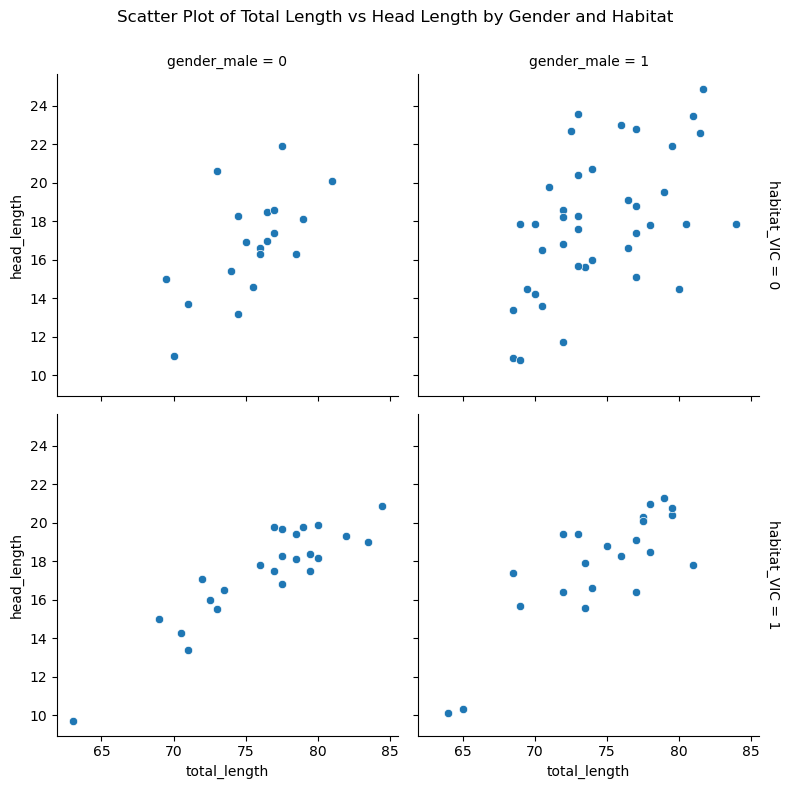

In [52]:
g = sns.FacetGrid(koala_data_encoded, col="gender_male", row="habitat_VIC", height=4, margin_titles=True)
g.map(sns.scatterplot, "total_length", "head_length")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Scatter Plot of Total Length vs Head Length by Gender and Habitat")
plt.show()

### Interpretation of the Graph:
This scatter plot illustrates the relationship between total length and head length of koalas, categorized by habitat (top: Queensland, bottom: Victoria) and gender (left: females, right: males).

**Key Insights:**

- **Gender-Based Patterns:**
  - Male koalas (right column) exhibit greater variation in head length and total length, especially in Queensland (top row), indicating more diverse growth patterns compared to females.
  - Female koalas (left column) show more uniform growth, with less variation in both head length and total length relative to body size.

- **Habitat-Based Differences:**
  - Queensland koalas (top row) display more scattered patterns in head length and total length, suggesting a wider range of growth patterns. This indicates that koalas in Queensland may experience more variation in their physical development.
  - Victoria koalas (bottom row), particularly males, show more consistent growth, with larger head lengths and total lengths. This suggests that Victoria koalas may be more uniform in size compared to Queensland koalas.

- **Overall Trend:**
  - There is a positive relationship between total length and head length across all groups, with more pronounced correlations seen in Victoria's koalas.

#### Why this visualisation?
This plot was chosen to visually highlight the interaction between habitat, gender, and physical characteristics. It provides insights into how koalas from different regions and genders exhibit varying growth patterns, with a focus on the distinct variations seen in Queensland koalas.

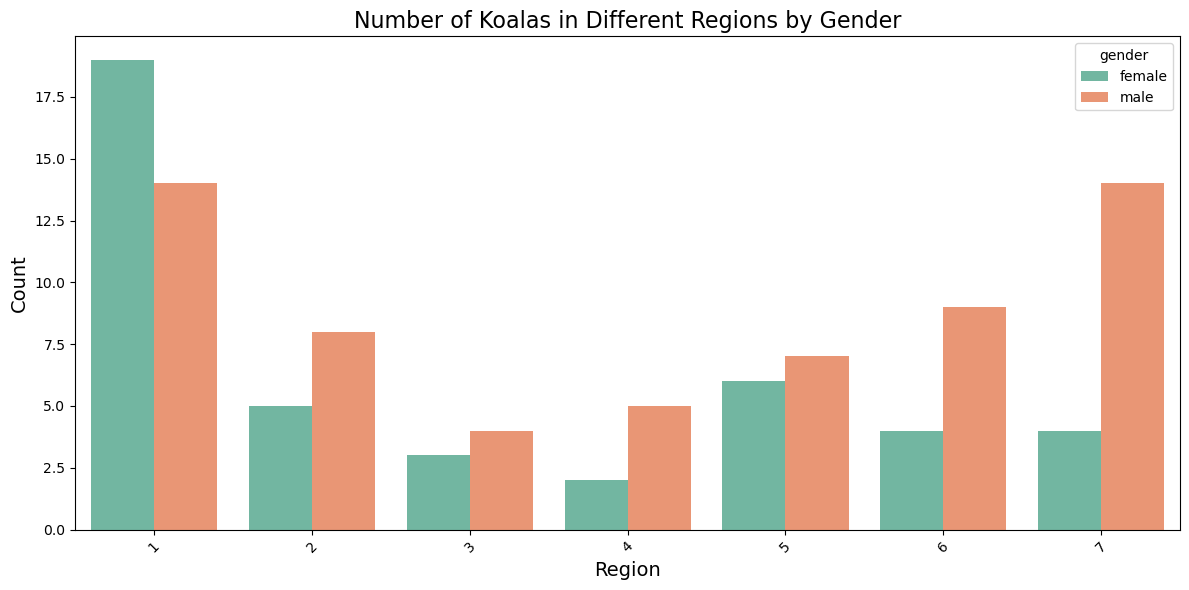

In [54]:
# Create a countplot using seaborn
plt.figure(figsize=(12, 6))

# Plotting count of koalas in different regions and habitats, divided by gender
sns.countplot(data=koala_data_encoded, x='region', hue='gender', palette='Set2')

# Add labels and title
plt.title('Number of Koalas in Different Regions by Gender', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

### Interpretation of the Graph:
* Region 1: This region has the highest overall koala population, with females outnumbering males. This suggests a relatively stable population with a slight gender bias towards females.

* Region 7: Despite having almost as many male koalas as Region 1, there is a significant gender imbalance in this region, with far fewer females compared to males. This could indicate potential issues with the breeding population or other environmental factors affecting female koalas in this area.

* Region 6: This region has the third highest number of male koalas, but female koalas are nearly half of the male population. The imbalance here is less extreme than in Region 7, but still notable.

* Region 2: The fourth largest male koala population is found here, with females representing just over half the number of males, indicating a moderate gender imbalance.

* Region 5: This region ranks fifth in terms of male koala count and has almost equal numbers of female koalas, though the total population is lower than other regions.

* Region 4: Here, there is a significant gender imbalance, with female koalas being less than half the number of males. This may point to environmental or biological factors specifically affecting the female population in this region.

* Region 3: This region has the lowest koala population overall, but the number of female koalas is similar to males, suggesting that while the population is small, the gender balance is relatively equal.

#### Why this visualisation?
This bar graph effectively illustrates the gender distribution of koalas across various regions, allowing for easy visual comparison. It highlights areas with gender imbalances, such as regions 7 and 6, where males significantly outnumber females, which is critical for understanding population dynamics. This insight can guide conservation strategies, with regions like 1 focusing on habitat protection, while regions with skewed ratios, like 7, may need targeted interventions to support the female population.

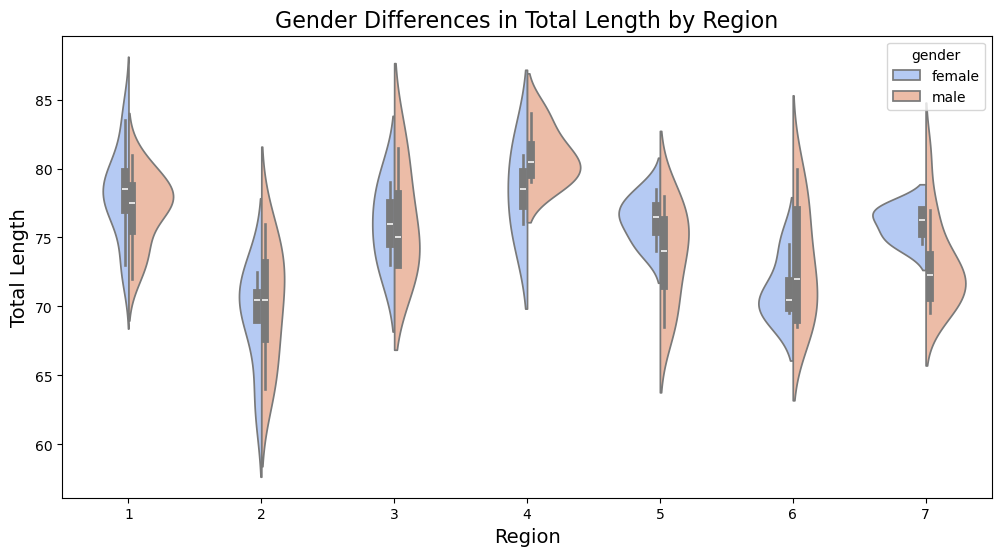

In [56]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=koala_data_encoded, x="region", y="total_length", hue="gender", split=True, palette="coolwarm")
plt.title("Gender Differences in Total Length by Region", fontsize=16)
plt.xlabel("Region", fontsize=14)
plt.ylabel("Total Length", fontsize=14)
plt.show()

### Interpretation of the Graph:
* Region 1: Both female and male distributions are almost symmetric, suggesting that koala lengths are evenly spread with no skewness in either direction. This indicates a balanced size distribution for koalas in this region.

* Region 2: Both female and male distributions are again almost symmetric, which indicates a similar balanced size spread for koalas. This suggests that there isn’t a significant variation in total length between shorter and longer koalas in this region.

* Region 3: The female distribution is symmetric but flatter, indicating more uniform lengths among females but with less density in any particular range. The male distribution is very slightly skewed to the left, meaning there are slightly more koalas with longer lengths, but the flat distribution suggests more variability across the range.

* Region 4: The female distribution is symmetric but flat, meaning length sizes are spread out evenly without a strong peak. The male distribution is also almost symmetric but slightly skewed to the left, indicating a slight dominance of koalas with longer lengths, but the skewness is minimal.

* Region 5: Female koalas in this region have a symmetric distribution, indicating a balanced spread of sizes. The male distribution is slightly skewed to the right, meaning there are slightly more males with shorter lengths, but the flat distribution suggests length variability is still quite large.

* Region 6: The female distribution is skewed to the right, indicating a higher frequency of shorter-length koalas, with fewer reaching longer lengths. The male distribution is flat, indicating a uniform spread of lengths with no clear concentration of shorter or longer koalas.

* Region 7: The female distribution is symmetric, showing an even spread of total lengths. The male distribution is almost symmetric but skewed slightly to the left, indicating more males with longer lengths compared to shorter ones, though the skewness is very slight.

#### Why this visualisation?
The violin plot was chosen for its ability to display both the distribution and spread of koala lengths, highlighting gender differences across regions. It offers:

* Detailed Distribution: Shows the median, range, and shape of koala lengths, revealing skewness and spread that simpler plots might miss.
* Gender Comparison: Clearly compares male and female koala lengths in each region.
* Variability Insight: Highlights variability within regions, useful for understanding regional factors affecting koala size.
* Conservation Planning: Helps identify regions with significant size or gender differences for targeted conservation strategies.

## Section - 3: Analysis

### 1. Is the mean head length of the Koalas significantly different from 92.0 mm?

To answer this, we can perform a one-sample t-test comparing the mean head length of the koalas to 92.0 mm.

Null Hypothesis (H₀): The mean head length of koalas is equal to 92.0 mm.

Alternative Hypothesis (H₁): The mean head length of koalas is not equal to 92.0 mm.

In [61]:
null_mean_value = 92.0
head_lengths = koala_data_encoded["head_length"]
alpha = 0.05

# One-sample t-test
t_stat, p_value = stats.ttest_1samp(head_lengths, null_mean_value)

print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Interpret results
if p_value < alpha:
    print( "Reject the null. The mean head length is significantly different from 92.0 mm.")
else:
    print("Fail to reject the null. No significant difference from 92.0 mm.")

T-statistic: -247.6055607724518, P-value: 9.142756658493866e-145
Reject the null. The mean head length is significantly different from 92.0 mm.


### 2. Do male and female Koalas have significantly different mean head lengths?

To compare the mean head lengths of male and female koalas, we can use an independent two-sample t-test.

Null Hypothesis (H₀): There is no significant difference in the mean head lengths of male and female koalas.

Alternative Hypothesis (H₁): There is a significant difference in the mean head lengths between male and female koalas.

In [64]:
# Separate head lengths by gender
male_head_lengths = koala_data_encoded[koala_data_encoded["gender_male"] == 1]["head_length"]
female_head_lengths = koala_data_encoded[koala_data_encoded['gender_female'] == 1]['head_length']
alpha = 0.05

# Two-sample t-test (independent)
t_stat, p_value = stats.ttest_ind(male_head_lengths, female_head_lengths)

print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Interpret results
if p_value < alpha:
    print("Reject the null. There is a significant difference in mean head lengths between male and female koalas.")
else:
    print("Fail to reject the null. No significant difference in head lengths between genders.")

T-statistic: 1.1845909185649293, P-value: 0.23893211144290333
Fail to reject the null. No significant difference in head lengths between genders.


### Evaluating Variance Inflation Factors of the dataset before proceeding with Regression

In [66]:
# Define the independent variables (e.g., features) and the dependent variable (target)
X = koala_data_encoded[["head_length", "paw_size", "skull_width", "foot_length", "ear_size", "eye_diameter", "chest_circumference", "belly_circumference"]]
y = koala_data_encoded["total_length"]

# Add a constant term to the model (for the intercept)
X = sm.add_constant(X)

# Calculate VIF for each feature to check multicollinearity
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns

# Calculate the VIF for each independent variable (feature)
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF data to check for multicollinearity
print("Variance Inflation Factors (VIF): \n", vif_data)

# If high VIFs are found (typically VIF > 10), multicollinearity may be a problem

Variance Inflation Factors (VIF): 
                Feature          VIF
0                const  1515.297323
1          head_length     1.997092
2             paw_size     1.396940
3          skull_width     2.214280
4          foot_length     3.310969
5             ear_size     3.214849
6         eye_diameter     1.350645
7  chest_circumference     1.909418
8  belly_circumference     1.514525


**Interpretation of Variance Inflation Factors (VIF):**

The VIF results measure the multicollinearity among the independent variables in your regression model. Here's how to interpret the VIF values:

- **VIF < 5**: Indicates low or acceptable multicollinearity.
- **VIF > 10**: Indicates high multicollinearity, suggesting that the variable is highly correlated with other variables and may cause instability in the model.

**Interpretation of Each Variable's VIF:**

- **Constant (1515.30)**: This high value is expected for the constant and doesn’t indicate multicollinearity issues with other variables.
- **Head Length (1.99)**: Shows low multicollinearity, indicating it can be safely included in the model without concerns.
- **Paw Size (1.40)**: Also has low multicollinearity and is acceptable for regression analysis.
- **Skull Width (2.21)**: Displays low multicollinearity, well within acceptable limits.
- **Foot Length (3.31)**: Moderate multicollinearity but still within acceptable limits; no immediate concerns.
- **Ear Size (3.21)**: Moderate multicollinearity but not problematic for inclusion in the model.
- **Eye Diameter (1.35)**: Has low multicollinearity and can remain in the model.
- **Chest Circumference (1.91)**: Shows low multicollinearity, suitable for regression analysis.
- **Belly Circumference (1.51)**: Displays low multicollinearity, no concerns.

**Conclusion:**

There are no significant multicollinearity concerns with the variables. All VIF values are below 5, indicating that the variables can be retained for regression analysis without affecting the stability or reliability of the model.

### 3. Can we predict the total length of a Koala based on its head length?

In [69]:
# Define X (independent variable) and y (dependent variable)
X = koala_data_encoded["head_length"]
y = koala_data_encoded["total_length"]

# Add a constant (intercept) to X
X = sm.add_constant(X)

# Fit the OLS model
model_ols = sm.OLS(y, X).fit()

# Print the summary of the model
print(model_ols.summary())

# Predict the total length
koala_data_encoded["predicted_total_length"] = model_ols.predict(X)

                            OLS Regression Results                            
Dep. Variable:           total_length   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     68.76
Date:                Mon, 14 Oct 2024   Prob (F-statistic):           4.73e-13
Time:                        23:45:28   Log-Likelihood:                -272.22
No. Observations:                 104   AIC:                             548.4
Df Residuals:                     102   BIC:                             553.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          59.4088      1.919     30.955      

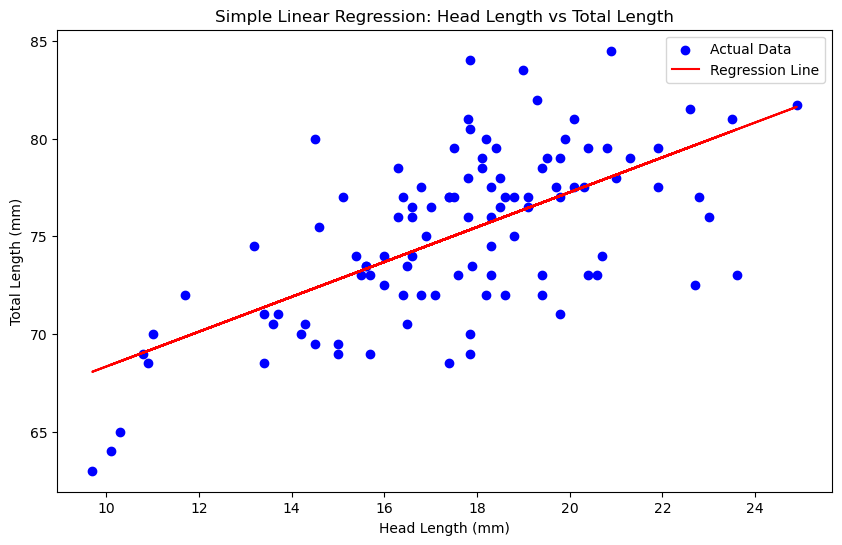

In [70]:
# Simple Linear Regression Visualization (Head Length vs Total Length)
plt.figure(figsize=(10, 6))

# Scatter plot of actual data
plt.scatter(koala_data_encoded["head_length"], koala_data_encoded["total_length"], label="Actual Data", color="blue")

# Plot the regression line (predicted values)
plt.plot(koala_data_encoded["head_length"], koala_data_encoded["predicted_total_length"], color="red", label="Regression Line")

# Labels and Title
plt.xlabel("Head Length (mm)")
plt.ylabel("Total Length (mm)")
plt.title("Simple Linear Regression: Head Length vs Total Length")
plt.legend()

# Show the plot
plt.show()

### Analysis
From the OLS regression results and the scatter plot with the regression line, we can observe the following:

1. Model Summary:
R-squared: The R-squared value is 0.403, which means that 40.3% of the variation in the total length of the koalas can be explained by the head length. While this indicates a moderate relationship, other factors may also contribute to total length.
Coefficients:
The intercept (const) is approximately 59.41 mm, which represents the expected total length when the head length is zero.
The coefficient for head length is 0.8923, meaning that for every 1 mm increase in head length, the total length increases by approximately 0.89 mm. This positive coefficient indicates a direct relationship between head length and total length.
P-value: The p-value for head length is 0.000, which is highly significant (less than 0.05). This suggests that head length is a statistically significant predictor of total length.
2. Visualization:
The scatter plot shows a positive linear relationship between head length and total length, with the red regression line fitting the data points reasonably well. There is some scatter around the line, indicating variability, but the upward trend is clear.

**Interpretation:**
The regression model provides evidence that head length is a significant predictor of total length in koalas. While the R-squared value of 0.403 suggests that head length alone does not fully explain the variation in total length (other factors are likely involved), the relationship is strong enough to make head length a reliable indicator of total body size.
In conclusion, based on the regression analysis, we can predict the total length of a koala using its head length, though other factors may also contribute to the overall variation in total length.

### 4. Can we predict the total length of a Koala based on multiple factors (head length, skull width, foot length)?

In [73]:
# Define X (independent variables) and y (dependent variable)
X = koala_data_encoded[["head_length", "skull_width", "foot_length"]]
y = koala_data_encoded["total_length"]

# Add a constant (intercept) to X
X = sm.add_constant(X)

# Fit the OLS model with multiple predictors
multi_model_ols = sm.OLS(y, X).fit()

# Print the summary of the model
print(multi_model_ols.summary())

# Predict the total length based on the multiple factors
koala_data_encoded["predicted_total_length"] = multi_model_ols.predict(X)

                            OLS Regression Results                            
Dep. Variable:           total_length   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     34.88
Date:                Mon, 14 Oct 2024   Prob (F-statistic):           1.64e-15
Time:                        23:45:28   Log-Likelihood:                -261.78
No. Observations:                 104   AIC:                             531.6
Df Residuals:                     100   BIC:                             542.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          55.0728      1.981     27.800      

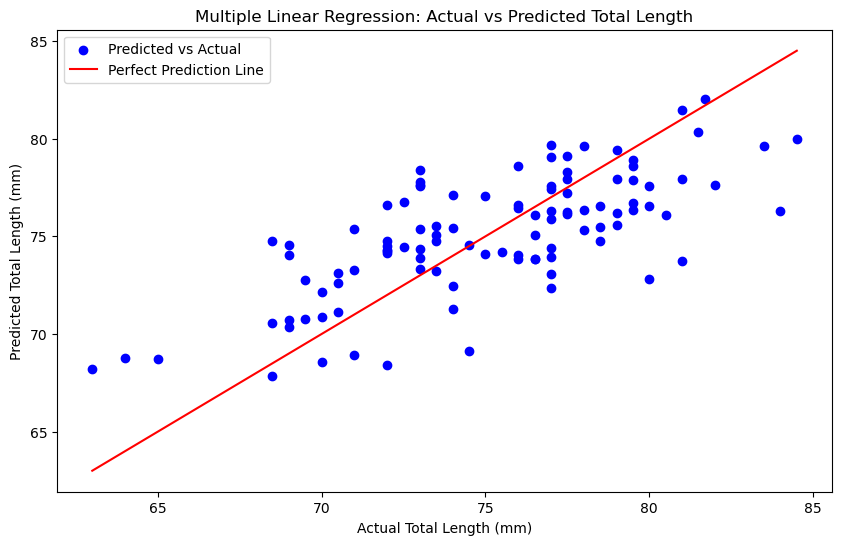

In [74]:
# Multiple Linear Regression Visualization (Predicted vs Actual Total Length)
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs predicted total lengths
plt.scatter(koala_data_encoded["total_length"], koala_data_encoded["predicted_total_length"], color="blue", label="Predicted vs Actual")

# Plot a reference line (Perfect prediction line: y = x)
plt.plot([koala_data_encoded["total_length"].min(), koala_data_encoded["total_length"].max()],
         [koala_data_encoded["total_length"].min(), koala_data_encoded["total_length"].max()],
         color="red", label="Perfect Prediction Line")

# Labels and Title
plt.xlabel("Actual Total Length (mm)")
plt.ylabel("Predicted Total Length (mm)")
plt.title("Multiple Linear Regression: Actual vs Predicted Total Length")
plt.legend()

# Show the plot
plt.show()

### Analysis
From the OLS regression results and the scatter plot with the regression line, we can observe the following:

1. Model Summary:
* R-squared: The R-squared value is 0.511, which means that 51.1% of the variation in the total length of the koalas can be explained by the combination of head length, skull width, and foot length. This is a moderate improvement over the simple regression model using only head length, indicating that adding multiple predictors improves the model's ability to explain variation in total length.

* Coefficients:
The constant (intercept) is approximately 55.07 mm, representing the expected total length when all predictor variables (head length, skull width, and foot length) are zero.
The coefficient for head length is 0.5086, meaning that for every 1 mm increase in head length, the total length increases by approximately 0.51 mm, assuming skull width and foot length remain constant.
The coefficient for skull width is 0.6095, indicating that for every 1 mm increase in skull width, the total length increases by approximately 0.61 mm.
The coefficient for foot length is 0.2255, meaning that for every 1 mm increase in foot length, the total length increases by approximately 0.23 mm.

* P-values: The p-values for head length (0.000), skull width (0.002), and foot length (0.003) are all below 0.05, indicating that each of these predictors is statistically significant in predicting the total length of koalas.

2. Visualization:
* The scatter plot of actual vs predicted total length shows that most of the predicted values (blue points) are close to the perfect prediction line (red line), indicating that the model provides a reasonably accurate prediction of total length based on head length, skull width, and foot length.
* Some scatter remains, suggesting that while the model is a good fit, other factors may also contribute to total length variation.

**Interpretation:**

* The multiple linear regression model significantly improves the prediction of total length by incorporating head length, skull width, and foot length as predictors. The R-squared value of 0.511 suggests that while these three factors account for just over half of the variation in total length, there is still unexplained variation, possibly due to other biological or environmental factors not included in the model.

* Each predictor—head length, skull width, and foot length—is statistically significant, meaning that all three characteristics contribute meaningfully to the prediction of total length.

In conclusion, the results indicate that the total length of a koala can be reliably predicted using a combination of head length, skull width, and foot length, though additional factors may still play a role in the overall variation of koala body size.

### 5. Do environmental factors such as state affect Koala’s physical characteristics?

In [77]:
# List of physical characteristics to test
characteristics = ["head_length", "paw_size", "skull_width", "foot_length", "ear_size", "eye_diameter", "chest_circumference", "belly_circumference"]

# Loop over each characteristic to perform ANOVA
for characteristic in characteristics:
    # Fit the ANOVA model for each characteristic
    model_anova = ols(f'{characteristic} ~ C(region) + C(habitat)', data=koala_data_encoded).fit()
    
    # Perform ANOVA
    anova_table = sm.stats.anova_lm(model_anova, typ=2)
    
    # Format the ANOVA table to avoid scientific notation
    anova_table_formatted = anova_table.copy()
    anova_table_formatted['sum_sq'] = anova_table['sum_sq'].apply(lambda x: '{:.10f}'.format(x))
    anova_table_formatted['F'] = anova_table['F'].apply(lambda x: '{:.10f}'.format(x) if pd.notnull(x) else 'NaN')
    anova_table_formatted['PR(>F)'] = anova_table['PR(>F)'].apply(lambda x: '{:.10f}'.format(x))
    
    # Print the formatted ANOVA table
    print(f"\nANOVA results for {characteristic}:")
    print(anova_table_formatted)
    
    # Interpret results with formatted p-value
    p_value = anova_table['PR(>F)'][0]
    formatted_p_value = "{:.10f}".format(p_value)  # Format each p-value individually
    
    if p_value < 0.05:
        print(f"Environmental factors (region) significantly affect koalas' {characteristic}.")
    else:
        print(f"No significant effect of region on koalas' {characteristic}.")
    
    # Print the formatted p-value
    print(f"Formatted p-value: {formatted_p_value}")



ANOVA results for head_length:
                     sum_sq    df              F        PR(>F)
C(region)   3695.3124086520   6.0  91.7643544089  0.0000000000
C(habitat)   323.7949003644   1.0  48.2440887920  0.0000000004
Residual     651.0249467199  97.0            NaN           nan
Environmental factors (region) significantly affect koalas' head_length.
Formatted p-value: 0.0000000000

ANOVA results for paw_size:
                     sum_sq    df               F        PR(>F)
C(region)   4086.7007029979   6.0  313.0253916237  0.0000000000
C(habitat)    56.2731393551   1.0   25.8618226751  0.0000017880
Residual     211.0637980168  97.0             NaN           nan
Environmental factors (region) significantly affect koalas' paw_size.
Formatted p-value: 0.0000000000

ANOVA results for skull_width:
                     sum_sq    df              F        PR(>F)
C(region)   1488.5530330276   6.0  64.4367402804  0.0000000000
C(habitat)   105.4390050730   1.0  27.3855709588  0.0000009633
Res

### Analysis

Based on the ANOVA results, it is evident that environmental factors—both region and habitat—significantly affect the physical characteristics of koalas. Here is a breakdown of the findings for each characteristic:

* **Head Length:**
    - Both region (p-value = 0.000) and habitat (p-value = 0.0000000004) significantly affect koalas' head length.
    - The F-statistics indicate a strong influence from both factors, with region explaining a larger portion of the variation.

* **Paw Size:**
    - Region (p-value = 0.000) and habitat (p-value = 0.0000017880) both significantly affect koalas' paw size. Region, however, has a much stronger impact.

* **Skull Width:**
    - Both region (p-value = 0.000) and habitat (p-value = 0.0000009633) significantly influence skull width, though region shows a larger overall effect.

* **Foot Length:**
    - Foot length is heavily influenced by both region (p-value = 0.000) and habitat (p-value = 0.000). Habitat shows an especially strong effect, with an F-statistic of 411.46, indicating that foot length is highly dependent on habitat.

* **Ear Size:**
    - Both region (p-value = 0.0000006811) and habitat (p-value = 0.000) significantly influence koalas' ear size, with habitat having a stronger effect.

* **Eye Diameter:**
    - Region significantly affects eye diameter (p-value = 0.000), but habitat does not (p-value = 0.432). This suggests that eye diameter is more influenced by geographic region than by specific habitat.

* **Chest Circumference:**
    - Both region (p-value = 0.000) and habitat (p-value = 0.000) have extremely strong effects on chest circumference, with region having the largest impact.

* **Belly Circumference:**
    - Both region (p-value = 0.000) and habitat (p-value = 0.000) significantly affect belly circumference, with region showing a greater influence overall.

**Conclusion:**

The results show that region consistently has a significant effect on all physical characteristics of koalas, while habitat also plays a critical role, especially in traits like foot length, ear size, and chest circumference. Eye diameter is the only trait where habitat does not have a significant impact. These findings suggest that koalas adapt their physical traits both to the geographical region they inhabit and to the specific environmental conditions within their habitats.

### 6. What factors are correlated with the total length of a Koala?

In [80]:
# Calculating the correlation matrix and finding correlations with 'total_length'
correlation_with_total_length = koala_data_encoded[encoded_numerical_columns].corr()["total_length"].sort_values(ascending=False)

# Displaying the correlation values between 'total_length' and other columns
print("Correlation among 'total_length' and other columns: \n", correlation_with_total_length)

Correlation among 'total_length' and other columns: 
 total_length           1.000000
head_length            0.634559
skull_width            0.602056
chest_circumference    0.545029
paw_size               0.481302
foot_length            0.443706
belly_circumference    0.397185
age_in_years           0.233533
eye_diameter           0.205051
gender_female          0.160200
ear_size               0.153644
habitat_VIC            0.078666
habitat_QLD           -0.078666
gender_male           -0.160200
region                -0.260843
Name: total_length, dtype: float64


### Analysis

Based on the correlation analysis, several factors are positively and negatively correlated with the total length of a koala. Here are the key findings:

#### Strong Correlations:
* **Head Length (0.63):** Koalas with longer heads tend to have longer total body lengths. This is the strongest correlation observed, suggesting that head length is a good indicator of total body size.
  
* **Skull Width (0.60):** Koalas with wider skulls tend to have longer bodies. Skull width is strongly correlated with total length, indicating a close relationship between head structure and overall size.

* **Chest Circumference (0.55):** Koalas with larger chest circumferences tend to have longer bodies, suggesting that overall body size and chest size grow proportionally.

* **Paw Size (0.48):** Larger paw sizes are positively correlated with longer total length, indicating that koalas with larger paws tend to have longer bodies.

* **Foot Length (0.44):** Koalas with longer feet tend to have longer total body lengths, demonstrating that body proportions grow together.

* **Belly Circumference (0.40):** Koalas with larger belly circumferences also tend to have longer bodies, reflecting overall growth in body mass.

#### Moderate Correlations:
* **Region (-0.26):** Region shows a negative correlation with total length, which may indicate that certain regions (like Queensland) are associated with smaller koalas compared to others.

* **Age in Years (0.23):** Older koalas tend to have longer bodies, though this relationship is moderate. This reflects a general growth pattern with age.

* **Eye Diameter (0.21):** Eye diameter shows a weak but positive correlation with total length, suggesting that longer koalas might have slightly larger eyes.

#### Weak Correlations:
* **Gender (Female: 0.16, Male: -0.16):** Female koalas show a slight positive correlation with total length, while males show a slight negative correlation, indicating that females might be slightly larger in body length than males.

* **Ear Size (0.15):** Koalas with larger ears tend to have longer bodies, though the relationship is weak.

* **Habitat VIC (0.08):** Koalas from Victoria show a weak positive correlation with total length, indicating that koalas from this habitat may be slightly longer.

* **Habitat QLD (-0.08):** Koalas from Queensland show a weak negative correlation with total length, suggesting that koalas from this area may tend to have slightly shorter bodies.

**Conclusion:**

Head length, skull width, chest circumference, paw size, and foot length are the most strongly correlated factors with the total length of a koala, indicating that body size and head structure grow proportionally. Meanwhile, region and habitat have weaker correlations but still play a role in determining overall body length.

## Section - 4: Recommendations

The findings from the analysis reveal critical insights that align with broader conservation strategies for protecting koalas. For instance, the identification of habitat-specific growth patterns and gender-based size variations highlights the need for targeted conservation efforts based on region-specific challenges. Koalas in Queensland show more variability in their physical characteristics compared to those in Victoria, suggesting that environmental pressures in Queensland may be more pronounced, possibly due to factors like habitat degradation, climate change, or urban encroachment (Terraube et al., 2023).

Broader conservation strategies, such as habitat preservation and restoration, are essential in regions like Queensland where variability indicates more stress. Protecting and expanding eucalyptus forests, which serve as koalas' primary food source and shelter, should be a priority (Cristescu et al., 2020). In alignment with these strategies, efforts to reduce urban development in koala habitats and implement wildlife corridors can help maintain genetic diversity and prevent isolation of populations (Terraube et al., 2023).

Additionally, the outliers observed in growth metrics, particularly in specific gender categories, suggest that disease management programs, such as those addressing chlamydia in koalas, should continue to be a focus. Effective disease control and wildlife health monitoring contribute directly to stabilizing population dynamics and ensuring long-term viability (Cristescu et al., 2020).

These findings support a comprehensive approach that integrates habitat protection, species health management, and climate adaptation strategies, ensuring that both Queensland and Victoria koala populations thrive in the face of ongoing environmental challenges (Terraube et al., 2023; Cristescu et al., 2020).